# Overview

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

**Objective**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

**Key Questions**

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


# 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics


# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.reset_defaults
plt.style.use('fivethirtyeight')
#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [2]:
housing_df= pd.read_csv('train.csv')

In [3]:
housing_df.shape

(1460, 81)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# 2. Data Cleansing and Imputation

There are 3 steps that we will do here so that we have a clean set of data to work with :
1. Data Type Correction - Correction of all variables which are incorrectily marked categorical/continuos
2. Data Imputation - Analyse the Data and impute Values/remove records where prediminant gaps are there. 
3. Outlier Removal - Since the predictions are very sensitive to outliers, we will try to remove them where possible without affecting the meaning of the data
4. Data Imbalance - We will drop variables which have the same values for 80% of the data as they wont contribute meaningfully to the target variable prediction


## Data Type Correction ##
Few Features are categorical and incorrectly marked as continuous. So we will convert them to the same later. Lets remove them from the explorations

- MSSubClass: Identifies the type of dwelling involved in the sale
-OverallQual: Rates the overall material and finish of the house
-OverallCond: Rates the overall condition of the house
-YearBuilt: Original construction date
-YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)  
-BsmtFullBath : Basement full bathrooms
-BsmtHalfBath : Basement half bathrooms
-FullBath : Full bathrooms above grade
-HalfBath: Half baths above grade
-BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
-KitchenAbvGr :  Kitchens above grade
-TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
-Fireplaces : Number of fireplaces
-GarageYrBlt : Year garage was built
-GarageCars: Size of garage in car capacity
-MoSold: Month Sold (MM)
-YrSold : Year Sold (YYYY)


In [6]:
change_data_type_feat=['MSSubClass','OverallQual','OverallCond','YearBuilt' ,'YearRemodAdd' ,'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                     'Fireplaces' , 'GarageYrBlt','GarageCars', 'MoSold', 'YrSold']


In [7]:
#First we will convert the data types which were converted into Int/Floats back to objects so that we have a complete datasets
print(housing_df.shape)
print("Columns to be converted to Categorical ",change_data_type_feat)
housing_df[change_data_type_feat] = housing_df[change_data_type_feat].astype(object)

(1460, 81)
Columns to be converted to Categorical  ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']


In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Data Imputation

**Continuous Features Imputation**

In [9]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])

missing_numeric_null_prcnt = round(100*housing_numeric.isnull().sum()/len(housing_numeric.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

In [10]:
housing_numeric.LotFrontage.describe()
#Mean or Median Imputation is fine

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
housing_numeric.MasVnrArea.describe()
#Median Imputation is desirable

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [12]:
#The values are spread out and can be replaced with the median

housing_df['LotFrontage'] =housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())
#housing_df['LotFrontage'].value_counts()
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())

**Categorical Variables Imputation**

In [13]:
#Lets first Analyse the Null Values and see Data can be imputed for Categorical Variables
housing_cat = housing_df.select_dtypes(include=['object'])
housing_cat.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageYrBlt        81
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
MasVnrType          8
Electrical          1
OverallQual         0
RoofMatl            0
RoofStyle           0
Exterior1st         0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
LandSlope           0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
MSZoning            0
Exterior2nd         0
SaleCondition       0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
PavedDrive          0
GarageCars          0
Fireplaces          0
Functional

In [14]:
housing_df.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [15]:
housing_df.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [16]:
housing_df.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [17]:
housing_df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [18]:
housing_df['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [19]:
housing_df['GarageCond'].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [20]:
housing_df['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [21]:
housing_df['BsmtCond'].value_counts(dropna=False)

#Looks like we can also replace NoBasement for all Basement Related Features

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [22]:
housing_df['MasVnrType'].value_counts(dropna=False)
## Looks like this is a typo - We will replace NaN with None

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [23]:
#Replacing NA values with more Meaningful ones from the Data Dictionary

housing_df['PoolQC'].fillna('None',inplace=True)
housing_df['MiscFeature'].fillna('None',inplace=True)
housing_df['Alley'].fillna('None',inplace=True)
housing_df['Fence'].fillna('None',inplace=True)
housing_df['FireplaceQu'].fillna('None',inplace=True)

#Garage will have NA for all related Features
housing_df['GarageCond'].fillna('None',inplace=True)
housing_df['GarageType'].fillna('None',inplace=True)
housing_df['GarageYrBlt'].fillna('None',inplace=True)
housing_df['GarageFinish'].fillna('None',inplace=True)
housing_df['GarageQual'].fillna('None',inplace=True)


housing_df['BsmtExposure'].fillna('None',inplace=True)
housing_df['BsmtFinType2'].fillna('None',inplace=True)
housing_df['BsmtFinType1'].fillna('None',inplace=True)
housing_df['BsmtCond'].fillna('None',inplace=True)
housing_df['BsmtQual'].fillna('None',inplace=True)
housing_df['BsmtQual'].fillna('None',inplace=True)
housing_df['MasVnrType'].fillna('None',inplace=True)

In [24]:
#Analyse the Null Values and see Data can be imputed
housing_df.isnull().sum().sort_values(ascending=False)

Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars  

Now the data Set looks Clean. Lets now analyse the data for outliers and remove the same. If we observe a large trend of outliers we will choose to ignore them. 
We can then see if there are techniques like Data Transformation which we can use to regularize them rather than stripping the same. 


## Outlier Removal

In [25]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082   103.117123   443.639726   
std     421.610009    22.027677    9981.264932   180.731373   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    60.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   164.250000   712.250000   
90%    1314.100000    92.000000   14381.700000   335.000000  1065.500000   
95%    1387.050000   104.000000   17401.150000   456.000000  1274.000000   
99%    1445.410000   137.410000   37567.640000   791.280000  1572.410000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       5.844521  1515.463699   472.980137    94.244521    46.660274   
std       48.623081   525.480383   213.804841   125.338794    66.256028   
min        0.000000   334.000000     0.000000     0.000000     0.000000   
25%        0.000000  1129.500000   334.500000     0.000000     0.000000   
50%        0.000000  1464.000000   480.000000     0.000000    25.000000   
75%        0.000000  1776.750000   576.000000   168.000000    68.000000   
90%        0.000000  2158.300000   757.100000   262.000000   130.000000   
95%        0.000000  2466.100000   850.100000   335.000000   175.050000   
99%      360.000000  3123.480000  1002.790000   505.460000   285.820000   
max      572.000000  5642.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
90%       112.000000     0.000000     0.000000     0.000000      0.000000   
95%       180.150000     0.000000   160.000000     0.000000      0.000000   
99%       261.050000   168.000000   268.050000     0.000000    700.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
90%    278000.000000  
95%    326100.000000  
99%    442567.010000  
max    755000.000000

In [26]:
#Common Function to remove outliers. We will use the Z Value to Do the same
def strip_outliers(colName, data=housing_df):
     print('Processing Field :',colName)
     print("Before : ",data.shape)
     #print(data[colName])
     data['z'] = np.abs(stats.zscore(data[colName]))
     data = data [data.z<3]
     data.drop(['z'], axis=1, inplace=True)
     print("After : ",data.shape)
     #plt.style.use('fivethirtyeight')
     #sns.boxplot(y=colName,data=data)
     #plt.show()
     return data
       



In [27]:
#Based on the above analysis outliers are there in the below fields which we will remove from the main data set 
#BsmtFinSF2,'ScreenPorch', 'MiscVal','PoolArea'
outlier_fields = ['LotFrontage','MasVnrArea','LotArea', 'BsmtUnfSF','GrLivArea', 'OpenPorchSF','SalePrice']
original_size = len(housing_df)
for field in outlier_fields :
    housing_df=strip_outliers(field, housing_df)


Processing Field : LotFrontage
Before :  (1460, 81)
After :  (1444, 81)
Processing Field : MasVnrArea
Before :  (1444, 81)
After :  (1413, 81)
Processing Field : LotArea
Before :  (1413, 81)
After :  (1399, 81)
Processing Field : BsmtUnfSF
Before :  (1399, 81)
After :  (1391, 81)
Processing Field : GrLivArea
Before :  (1391, 81)
After :  (1382, 81)
Processing Field : OpenPorchSF
Before :  (1382, 81)
After :  (1357, 81)
Processing Field : SalePrice
Before :  (1357, 81)
After :  (1340, 81)


In [28]:
#check if there is a loss of meaning after outlier stripping
retained_data = round(100*(len(housing_df)/original_size),2)
print(retained_data,"%")

91.78 %


In [29]:
#Lets look at the fields again
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id  LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  \
count  1340.000000  1340.000000   1340.000000  1340.000000  1340.000000   
mean    732.159701    67.999254   9466.325373    81.782090   411.673134   
std     423.193826    17.961643   3886.913809   132.688837   402.357449   
min       1.000000    21.000000   1300.000000     0.000000     0.000000   
25%     365.750000    60.000000   7402.000000     0.000000     0.000000   
50%     734.500000    69.000000   9205.000000     0.000000   368.000000   
75%    1095.250000    77.000000  11211.000000   137.250000   685.000000   
90%    1316.100000    89.000000  13571.200000   288.000000   998.000000   
95%    1390.050000    99.000000  15613.450000   362.150000  1172.400000   
99%    1446.610000   120.000000  23136.750000   548.930000  1440.610000   
max    1460.000000   134.000000  34650.000000   640.000000  1619.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     44.857463   556.558955  1013.089552  1119.783582   327.871642   
std     156.134638   425.786100   379.594321   336.888838   412.361159   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   217.750000   783.750000   864.000000     0.000000   
50%       0.000000   479.500000   969.000000  1057.500000     0.000000   
75%       0.000000   801.500000  1240.000000  1329.000000   709.500000   
90%     108.200000  1195.300000  1518.200000  1610.400000   900.100000   
95%     391.000000  1422.100000  1680.100000  1718.050000  1072.450000   
99%     782.030000  1692.050000  1885.470000  2055.450000  1309.660000   
max    1474.000000  1869.000000  3206.000000  2898.000000  1611.000000   

       LowQualFinSF    GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean       4.610448  1452.265672   456.328358    89.498507    39.636567   
std       41.782883   439.488828   200.916023   119.666418    52.462128   
min        0.000000   334.000000     0.000000     0.000000     0.000000   
25%        0.000000  1113.750000   308.000000     0.000000     0.000000   
50%        0.000000  1425.500000   468.000000     0.000000    20.000000   
75%        0.000000  1718.000000   572.000000   166.000000    62.000000   
90%        0.000000  2036.100000   691.000000   250.200000   118.100000   
95%        0.000000  2267.150000   826.000000   322.100000   152.000000   
99%      185.890000  2623.220000   918.710000   475.220000   211.000000   
max      528.000000  2898.000000  1356.000000   736.000000   240.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1340.000000  1340.000000  1340.000000  1340.000000   1340.000000   
mean       22.698507     3.373881    14.078358     1.851493     45.271642   
std        60.801039    29.177340    52.749544    34.144746    516.232009   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
90%       112.000000     0.000000     0.000000     0.000000      0.000000   
95%       184.000000     0.000000   152.050000     0.000000      0.000000   
99%       257.050000   168.000000   263.050000     0.000000    700.000000   
max       386.000000   508.000000   440.000000   738.000000  15500.000000   

           SalePrice  
count    1340.000000  
mean   169534.841791  
std     60401.708613  
min     35311.000000  
25%    128000.000000  
50%    157250.000000  
75%    200230.750000  
90%    257050.000000  
95%    290000.000000  
99%    338872.500000  
max    374000.000000

**Observation** : 95% of Records are retained after stripping. This is a good result. 
Outliers have also reduced. 

## Data Imbalance Correction

We will drop Features which have more than 80% of the variables having the same value, as they will not contribute to the analysis

**Continuous Features Imbalance Correction**

In [30]:
##Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=housing_df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
housing_df = housing_df.drop(num_cols_to_be_removed, axis=1)
print (housing_df.shape)

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  7 

(1340, 74)


**Categorical Features Imbalance Correction**

In [31]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=housing_df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
housing_df = housing_df.drop(columns_to_be_removed, axis=1)
housing_df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  26 



Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1         60       RL         65.0     8450      Reg    Inside   
1   2         20       RL         80.0     9600      Reg       FR2   
2   3         60       RL         68.0    11250      IR1    Inside   
3   4         70       RL         60.0     9550      IR1    Corner   
4   5         60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd  \
0      CollgCr     2Story           7           5      2003         2003   
1      Veenker     1Story           6           8      1976         1976   
2      CollgCr     2Story           7           5      2001         2002   
3      Crawfor     2Story           7           5      1915         1970   
4      NoRidge     2Story           8           5      2000         2000   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath FullBath HalfBath  \
0        Ex       856       854       1710            1        2        1   
1        Ex      1262         0       1262            0        2        0   
2        Ex       920       866       1786            1        2        1   
3        Gd       961       756       1717            1        1        0   
4        Ex      1145      1053       2198            1        2        1   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces FireplaceQu GarageType  \
0            3          Gd            8          0        None     Attchd   
1            3          TA            6          1          TA     Attchd   
2            3          Gd            6          1          TA     Attchd   
3            3          Gd            7          1          Gd     Detchd   
4            4          Gd            9          1          TA     Attchd   

  GarageYrBlt GarageFinish GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0        2003          RFn          2         548           0           61   
1        1976          RFn          2         460         298            0   
2        2001          RFn          2         608           0           42   
3        1998          Unf          3         642           0           35   
4        2000          RFn          3         836         192           84   

  Fence MoSold YrSold  SalePrice  
0  None      2   2008     208500  
1  None      5   2007     181500  
2  None      9   2008     223500  
3  None      2   2006     140000  
4  None     12   2008     250000

In [32]:
housing_df.shape

(1340, 48)

**Derived Variables** 

Now we will look at the dateFields and use them to create more meaningful Categorical Variables

The Goal is to convert the Nominal,Ordinal variables to more meaningful Increment, Ratio Variables
- #YearBuilt #YearRemodAdd #YrSold #MoSold GarageYrBlt

In [33]:
housing_df['PropertyAge'] = housing_df.YrSold - housing_df.YearBuilt
housing_df.PropertyAge = housing_df.PropertyAge.astype(int)


In [34]:
def isRemodelled(row):
    yrBuilt = row.YearBuilt
    yrRemod = row.YearRemodAdd
    if (yrBuilt==yrRemod):
        return 'No'
    elif yrBuilt<yrRemod:
        return 'Yes'
    else :
        return 'Null'
        print("Remod<Built")

housing_df['isRemodelled'] = housing_df.apply(isRemodelled, axis=1)
housing_df.isRemodelled.value_counts()

No     714
Yes    626
Name: isRemodelled, dtype: int64

<AxesSubplot:>

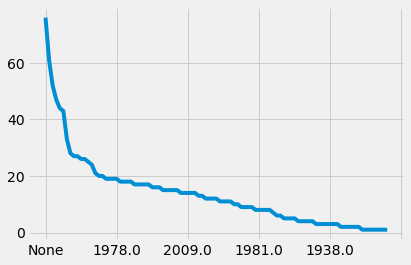

In [35]:
housing_df.GarageYrBlt.value_counts().plot()
#It looks quite sparsely distributed to meaningfully predict values, Best to drop the same. There is already of Category of GarageType which will cover the inferences from the same

In [36]:
#Lets drop the remaining variables
housing_df = housing_df.drop(['YearBuilt', 'YearRemodAdd','YrSold','GarageYrBlt'], axis=1)
housing_df = housing_df.drop(['Id'], axis=1)

In [37]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1340 non-null   object 
 1   MSZoning      1340 non-null   object 
 2   LotFrontage   1340 non-null   float64
 3   LotArea       1340 non-null   int64  
 4   LotShape      1340 non-null   object 
 5   LotConfig     1340 non-null   object 
 6   Neighborhood  1340 non-null   object 
 7   HouseStyle    1340 non-null   object 
 8   OverallQual   1340 non-null   object 
 9   OverallCond   1340 non-null   object 
 10  Exterior1st   1340 non-null   object 
 11  Exterior2nd   1340 non-null   object 
 12  MasVnrType    1340 non-null   object 
 13  MasVnrArea    1340 non-null   float64
 14  ExterQual     1340 non-null   object 
 15  Foundation    1340 non-null   object 
 16  BsmtQual      1340 non-null   object 
 17  BsmtExposure  1340 non-null   object 
 18  BsmtFinType1  1340 non-null 

# 3. Data Analysis and Preparation

In this Phase we will do : Univariate Analysis of the Numeric and Categorical Features. During this process, This will help us identify trends, and in the data and also help us cleanse some more features based on Business Understanding
1. Univariate Distribution Analysis of Continuous Variables
2. MultiVariate Correlation Analysis of Continous Variables
3. Univariate Analysis of Categorical Variables
4. Visualization of the Target Variable
5. BiVariate Analysis of Continuous Variable with Target Variable

**Univariate Distribution Analysis of Continuous Variables**

In [38]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64', 'int32', 'float32'])
len(housing_numeric.columns)


14

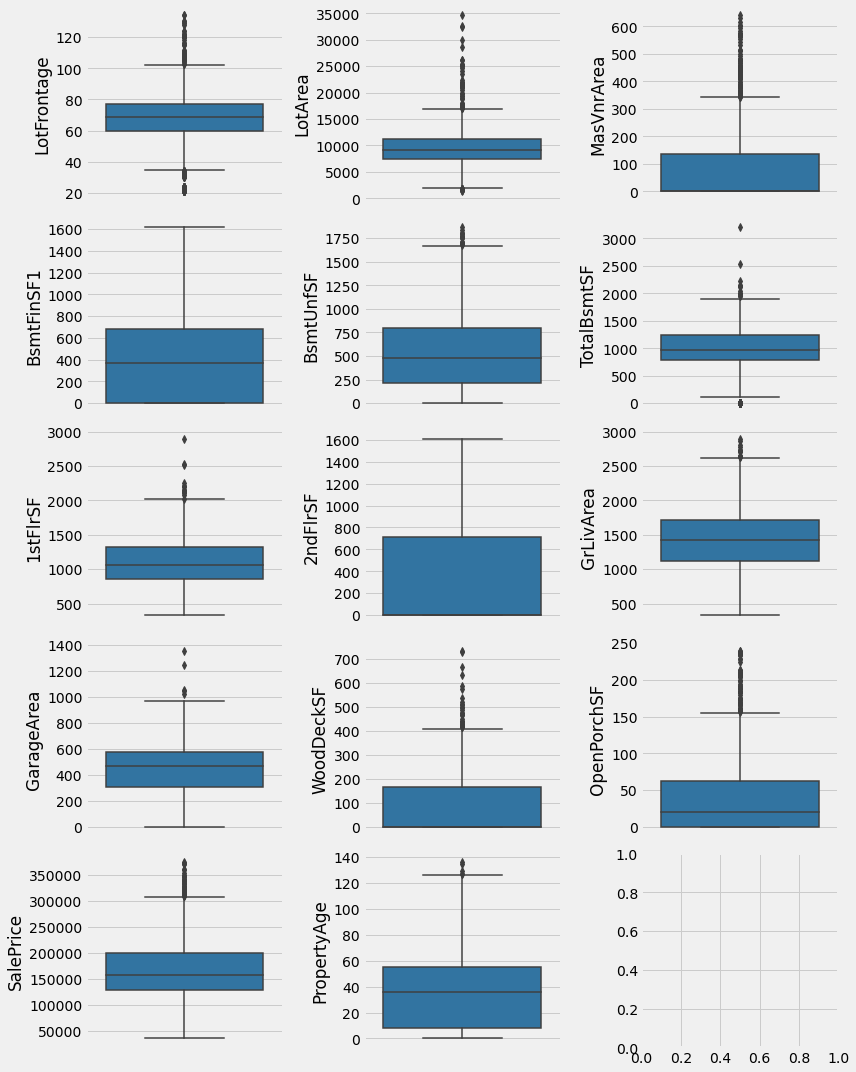

In [39]:
#Plot variables for outlier correction 

all_quant_variables = housing_numeric.columns
nr_rows =5
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
sns.reset_defaults()
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(all_quant_variables):
            sns.boxplot(y=all_quant_variables[i], data=housing_numeric, ax = axs[r][c])    
plt.tight_layout() 
plt.show()

**Observations** :
- Most of the variables looks distributed normally.
- Further elimination can be done using RFE

**BiVariate Analysis of Continuous Categorical Variables**

In [40]:
housing_df.select_dtypes(include=['object']).columns
housing_cont_cat = ['MasVnrArea','BsmtFullBath','FullBath','HalfBath',]

In [41]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1340 non-null   object 
 1   MSZoning      1340 non-null   object 
 2   LotFrontage   1340 non-null   float64
 3   LotArea       1340 non-null   int64  
 4   LotShape      1340 non-null   object 
 5   LotConfig     1340 non-null   object 
 6   Neighborhood  1340 non-null   object 
 7   HouseStyle    1340 non-null   object 
 8   OverallQual   1340 non-null   object 
 9   OverallCond   1340 non-null   object 
 10  Exterior1st   1340 non-null   object 
 11  Exterior2nd   1340 non-null   object 
 12  MasVnrType    1340 non-null   object 
 13  MasVnrArea    1340 non-null   float64
 14  ExterQual     1340 non-null   object 
 15  Foundation    1340 non-null   object 
 16  BsmtQual      1340 non-null   object 
 17  BsmtExposure  1340 non-null   object 
 18  BsmtFinType1  1340 non-null 

In [42]:
#List of categorical Columns
housing_cat = housing_df.select_dtypes(include=['object'])
housing_cat.head()

MSSubClass MSZoning LotShape LotConfig Neighborhood HouseStyle OverallQual  \
0         60       RL      Reg    Inside      CollgCr     2Story           7   
1         20       RL      Reg       FR2      Veenker     1Story           6   
2         60       RL      IR1    Inside      CollgCr     2Story           7   
3         70       RL      IR1    Corner      Crawfor     2Story           7   
4         60       RL      IR1       FR2      NoRidge     2Story           8   

  OverallCond Exterior1st Exterior2nd MasVnrType ExterQual Foundation  \
0           5     VinylSd     VinylSd    BrkFace        Gd      PConc   
1           8     MetalSd     MetalSd       None        TA     CBlock   
2           5     VinylSd     VinylSd    BrkFace        Gd      PConc   
3           5     Wd Sdng     Wd Shng       None        TA     BrkTil   
4           5     VinylSd     VinylSd    BrkFace        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1 HeatingQC BsmtFullBath FullBath HalfBath  \
0       Gd           No          GLQ        Ex            1        2        1   
1       Gd           Gd          ALQ        Ex            0        2        0   
2       Gd           Mn          GLQ        Ex            1        2        1   
3       TA           No          ALQ        Gd            1        1        0   
4       Gd           Av          GLQ        Ex            1        2        1   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces FireplaceQu GarageType  \
0            3          Gd            8          0        None     Attchd   
1            3          TA            6          1          TA     Attchd   
2            3          Gd            6          1          TA     Attchd   
3            3          Gd            7          1          Gd     Detchd   
4            4          Gd            9          1          TA     Attchd   

  GarageFinish GarageCars Fence MoSold isRemodelled  
0          RFn          2  None      2           No  
1          RFn          2  None      5           No  
2          RFn          2  None      9          Yes  
3          Unf          3  None      2          Yes  
4          RFn          3  None     12           No

In [43]:
def showbarlabel(graph, rotate=0):
    graph.set_xticklabels(graph.get_xticklabels(),rotation=rotate)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [44]:
def plot_bar(by,rotate=0):
    graph = housing_cat[by].value_counts().plot(kind='bar',ax = axs[r][c])
    showbarlabel(graph)

In [45]:
all_cat_variables = housing_cat.columns
print(len(all_cat_variables))

31


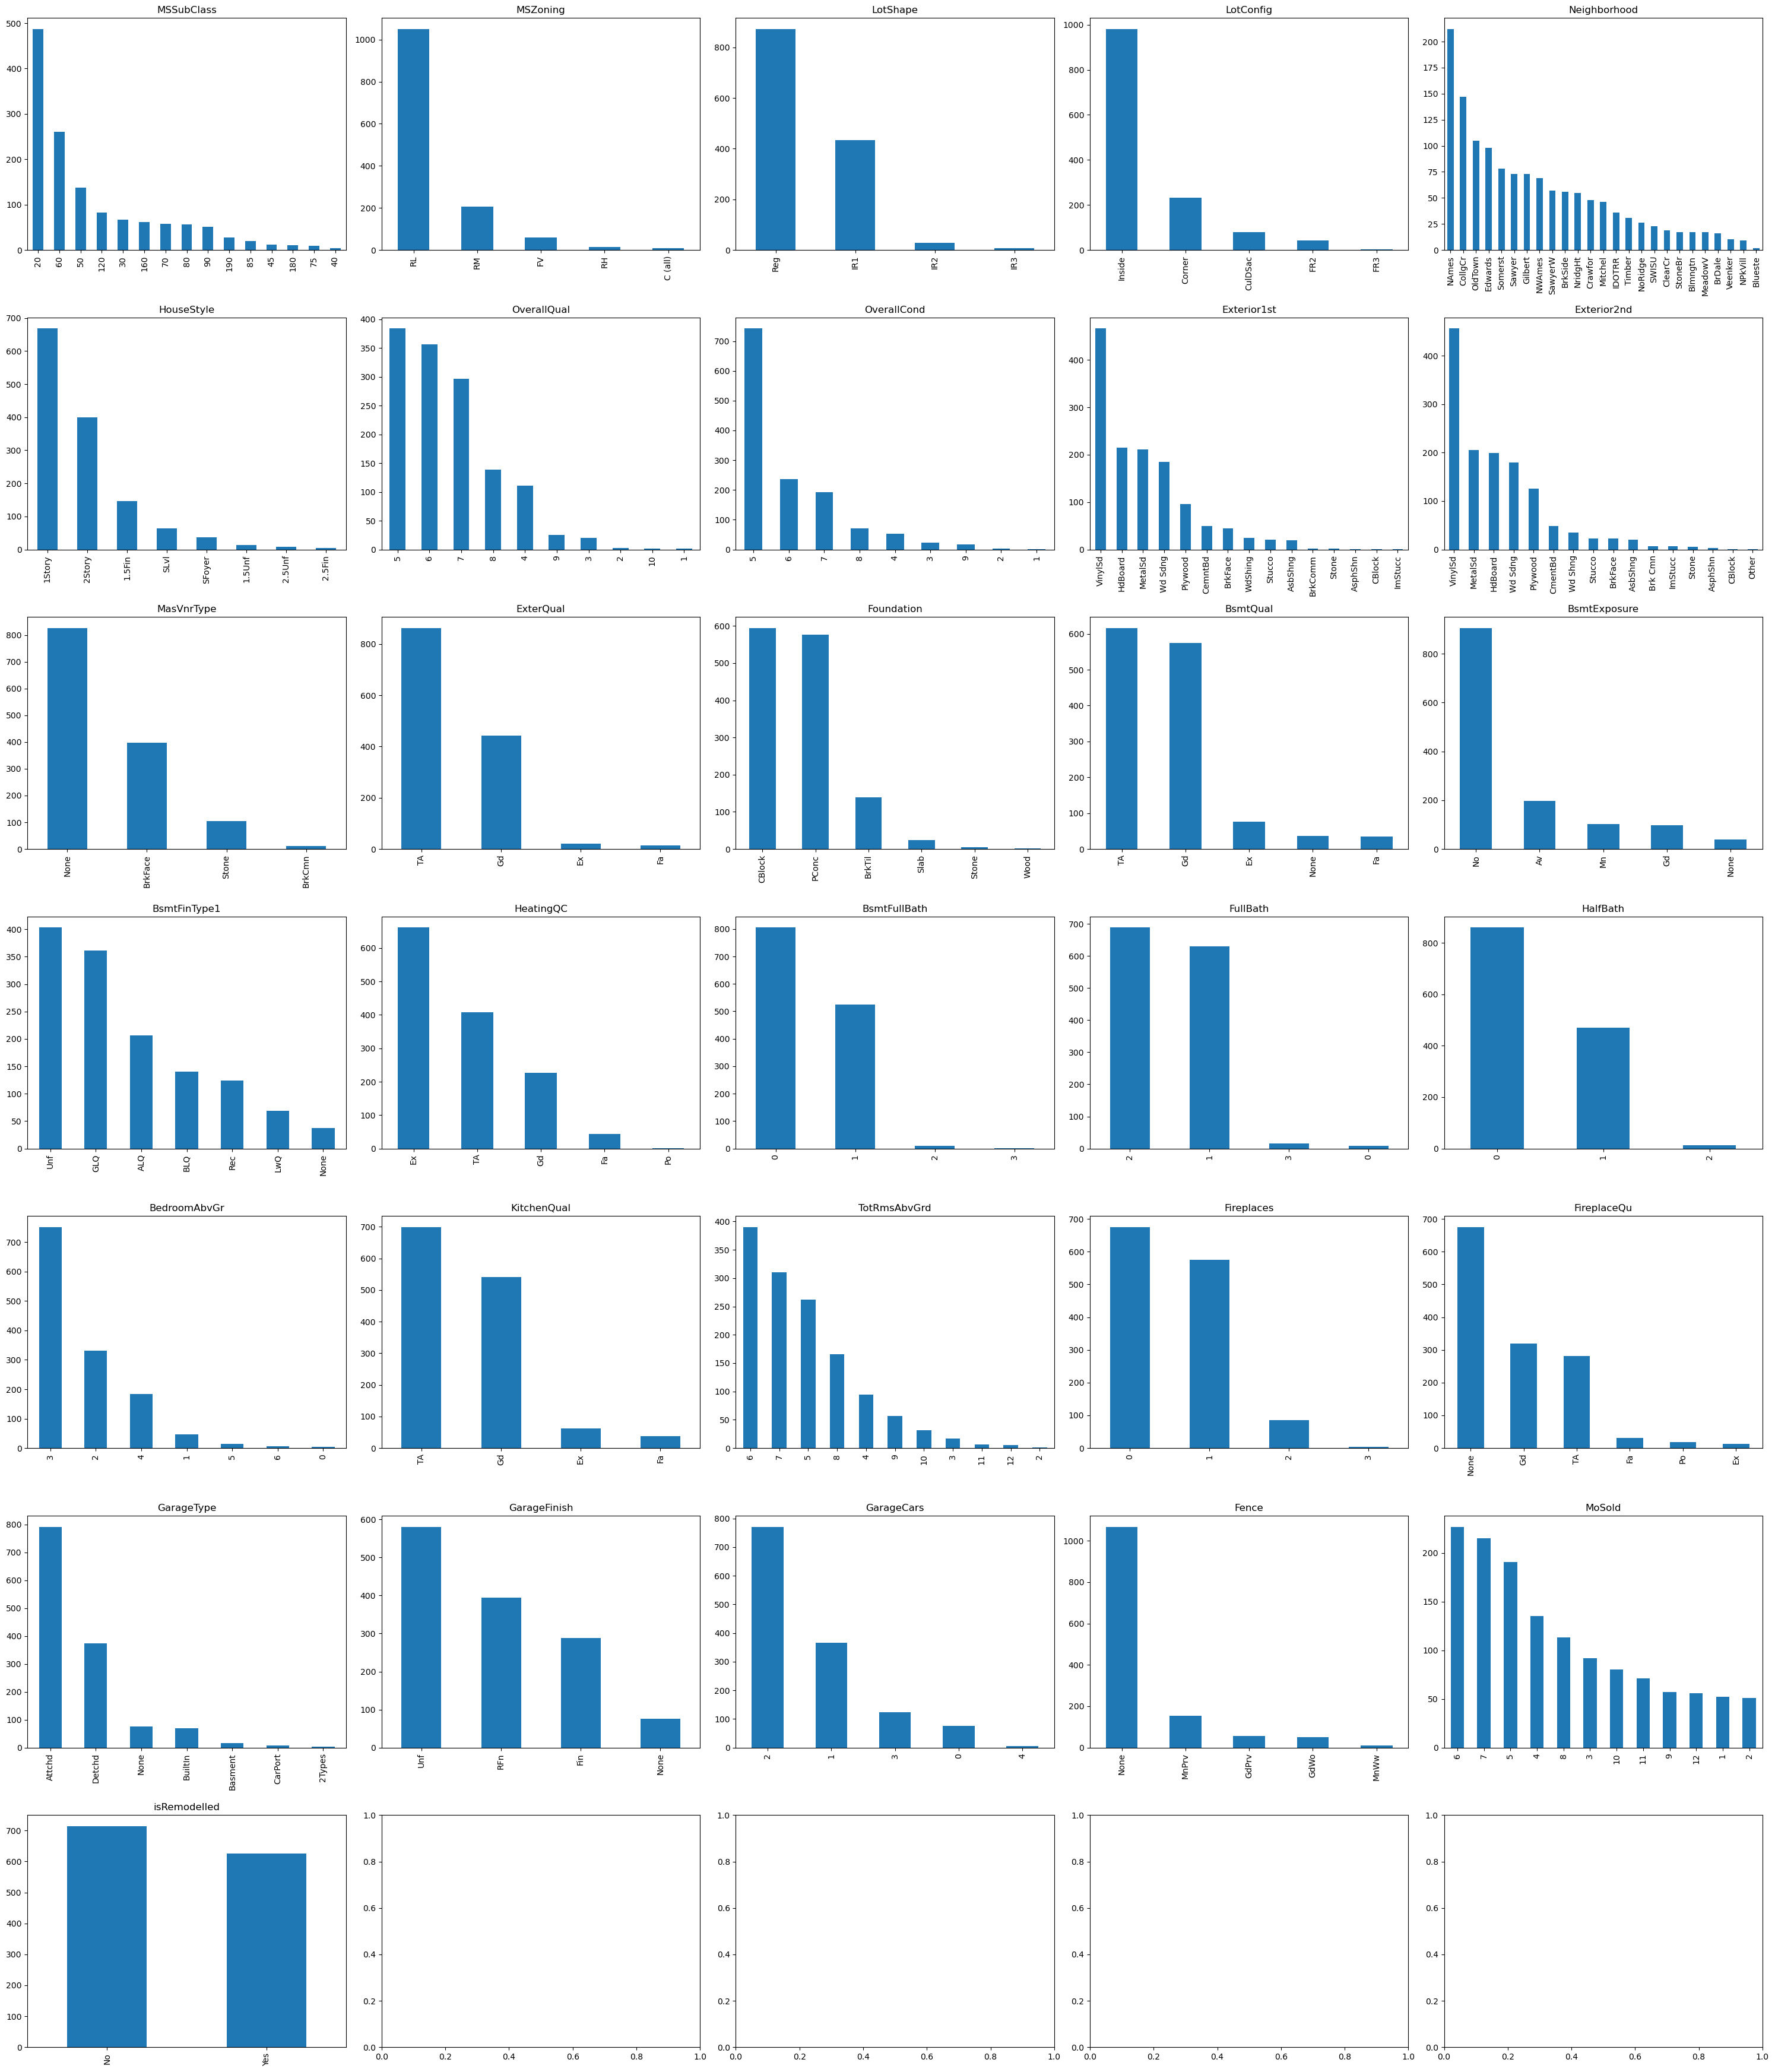

In [46]:
#Plot variables for outlier correction 

all_cat_variables = housing_cat.columns

nr_rows =7
nr_cols = 5
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*5))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(all_cat_variables):
            graph = housing_cat[all_cat_variables[i]].value_counts().plot(kind='bar',ax = axs[r][c])
            #axs[r][c].set_xlabel(housing_cat.columns[i])
            axs[r][c].set_title(housing_cat.columns[i])
            #graph.title(housing_cat.columns[i])
            #sns.barplot(y=all_cat_variables[i], data=housing_cat, ax = axs[r][c])    
plt.tight_layout() 
plt.style.use('fivethirtyeight')
plt.show()

**Visualization of the Target Variable**

mu=169534.84179104478, sigma=60379.166455677674


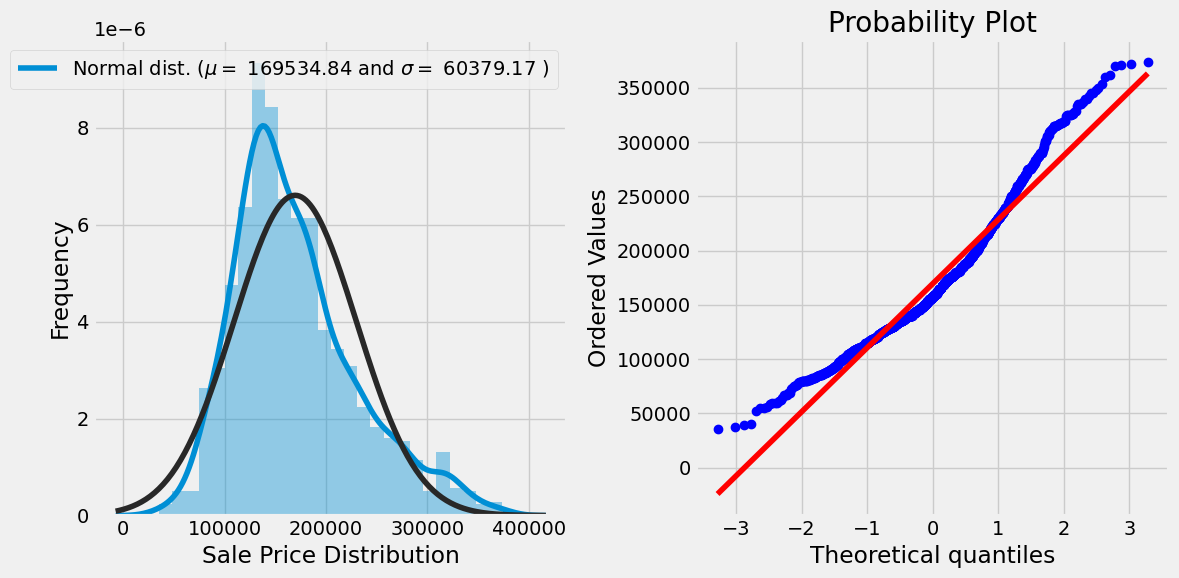

In [47]:
from scipy.stats import norm

def plot_distribution(row):
    fig, axs = plt.subplots(1,2,figsize=(12,6) )

    plt.subplot(121)
    ax = sns.distplot(row,  fit=norm)
    plt.xlabel("Sale Price Distribution")
    plt.ylabel("Frequency")
    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(row)
    print ("mu={0}, sigma={1}".format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')

    plt.subplot(122)
    res = stats.probplot(row, plot=plt)

    plt.autoscale()
    plt.tight_layout()
    plt.show()

plot_distribution(housing_df['SalePrice'])

mu=11.978636746902215, sigma=0.356465436862451


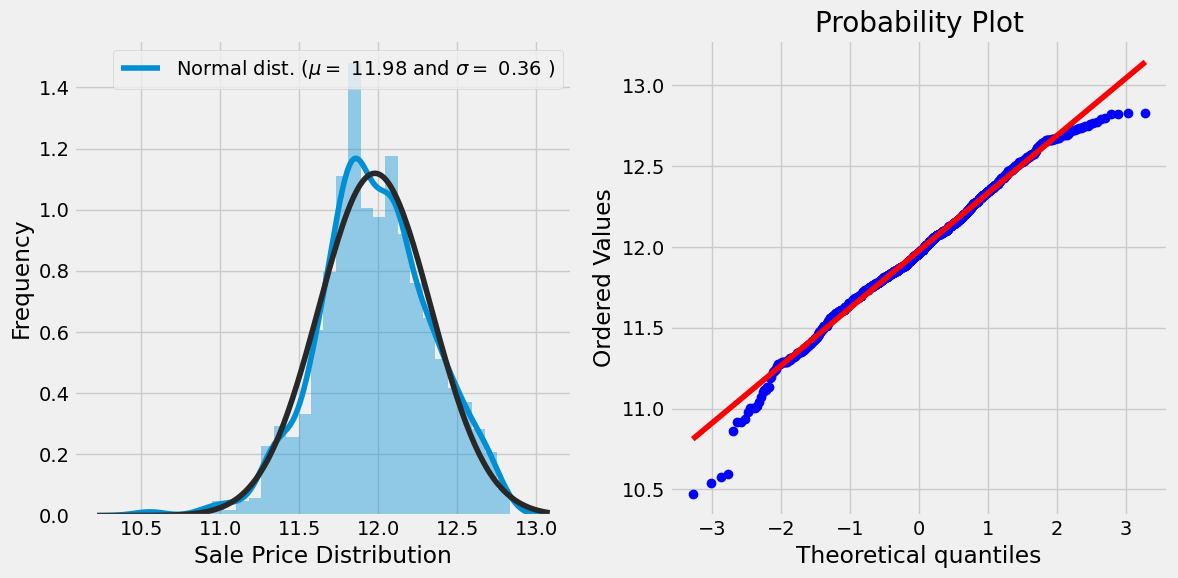

In [48]:
#converting the target Variable to Log to see if it can be normalized
log_sale_price = np.log(housing_df['SalePrice'])

plot_distribution(log_sale_price)

mu=405.45987787108237, sigma=71.67376945446448


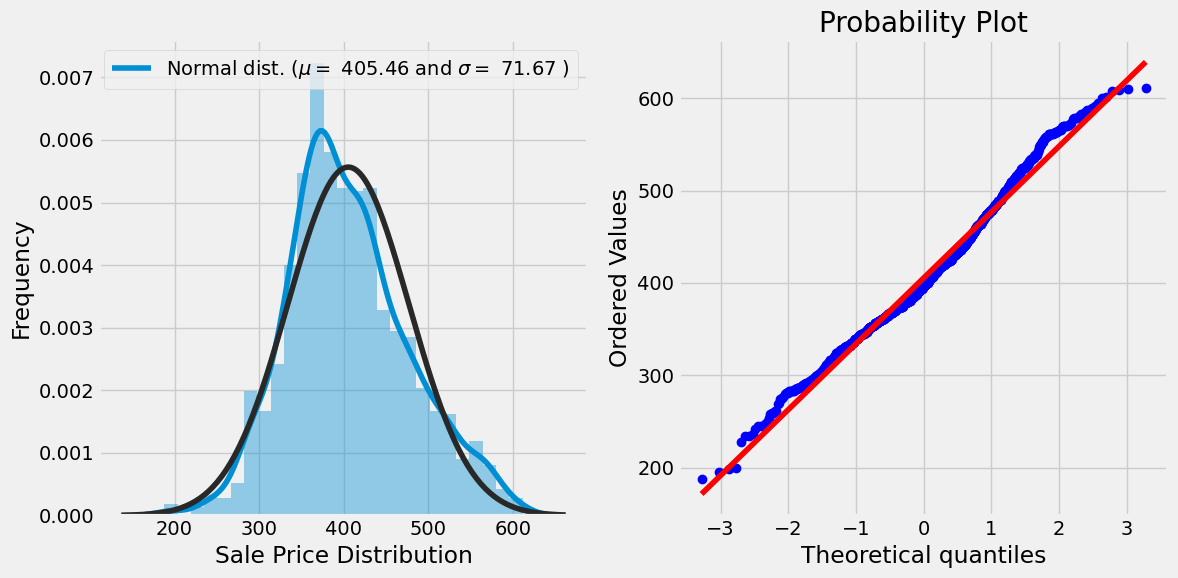

In [49]:
#converting the target Variable to Log to see if it can be normalized
log1p_sale_price = np.sqrt(housing_df['SalePrice'])

plot_distribution(log1p_sale_price)

We will go with a log transformation as that looks to be a better fit, as all the data points fit inside the normal curve, and the coeffecients are also within limits. 



In [50]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

**BiVariate Analysis of Continuous Variable with Target Variable**

In [51]:
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
price = housing_numeric.pop('SalePrice')
print(len(housing_numeric.columns))
all_numeric_cols = housing_numeric.columns

housing_numeric.head()

13


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0       856       854       1710         548           0           61   
1      1262         0       1262         460         298            0   
2       920       866       1786         608           0           42   
3       961       756       1717         642           0           35   
4      1145      1053       2198         836         192           84   

   PropertyAge  
0            5  
1           31  
2            7  
3           91  
4            8

In [52]:
housing_df.shape

(1340, 45)

# 4. Data Preparation

We will now prepare the data for Training. We will do the following steps 

1. Dummy Variables Creation for all Categorical Variables
2. Multi Collinearity Check
3. Break into train and test
4. Scale all Numeric Variables


**Dummy Variables Creation**

- *Bypassing the Curse of Dimensionality*
 - We will use OHE - for Nominal Varibles
 - We will use LabelEncoding for - Ordinal Variables
 - Ref - https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor


In [53]:
house_cat = housing_df.select_dtypes(include=['object'])
house_cat.head()

MSSubClass MSZoning LotShape LotConfig Neighborhood HouseStyle OverallQual  \
0         60       RL      Reg    Inside      CollgCr     2Story           7   
1         20       RL      Reg       FR2      Veenker     1Story           6   
2         60       RL      IR1    Inside      CollgCr     2Story           7   
3         70       RL      IR1    Corner      Crawfor     2Story           7   
4         60       RL      IR1       FR2      NoRidge     2Story           8   

  OverallCond Exterior1st Exterior2nd MasVnrType ExterQual Foundation  \
0           5     VinylSd     VinylSd    BrkFace        Gd      PConc   
1           8     MetalSd     MetalSd       None        TA     CBlock   
2           5     VinylSd     VinylSd    BrkFace        Gd      PConc   
3           5     Wd Sdng     Wd Shng       None        TA     BrkTil   
4           5     VinylSd     VinylSd    BrkFace        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1 HeatingQC BsmtFullBath FullBath HalfBath  \
0       Gd           No          GLQ        Ex            1        2        1   
1       Gd           Gd          ALQ        Ex            0        2        0   
2       Gd           Mn          GLQ        Ex            1        2        1   
3       TA           No          ALQ        Gd            1        1        0   
4       Gd           Av          GLQ        Ex            1        2        1   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces FireplaceQu GarageType  \
0            3          Gd            8          0        None     Attchd   
1            3          TA            6          1          TA     Attchd   
2            3          Gd            6          1          TA     Attchd   
3            3          Gd            7          1          Gd     Detchd   
4            4          Gd            9          1          TA     Attchd   

  GarageFinish GarageCars Fence MoSold isRemodelled  
0          RFn          2  None      2           No  
1          RFn          2  None      5           No  
2          RFn          2  None      9          Yes  
3          Unf          3  None      2          Yes  
4          RFn          3  None     12           No

In [54]:
housing_df['o_LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
housing_df['o_ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['o_BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['o_BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['o_BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_df['o_HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['o_KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['o_FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['o_GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_df['o_OverallQual'] = housing_df['OverallQual']
housing_df['o_OverallCond'] = housing_df['OverallCond']
housing_df['o_BsmtFullBath']=housing_df['BsmtFullBath']
housing_df['o_FullBath']=housing_df['FullBath']
housing_df['o_HalfBath']=housing_df['HalfBath']
housing_df['o_BedroomAbvGr']=housing_df['BedroomAbvGr']
housing_df['o_TotRmsAbvGrd']=housing_df['TotRmsAbvGrd']
housing_df['o_Fireplaces']=housing_df['Fireplaces']
housing_df['o_GarageCars']=housing_df['GarageCars']
housing_df['o_MoSold']=housing_df['MoSold']
housing_ordinal_col = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'OverallQual','OverallCond' ,'BsmtFullBath' , 'FullBath', \
                          'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',  'Fireplaces','GarageCars', 'MoSold']
final_df = housing_df.drop(housing_ordinal_col, axis=1)

final_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood HouseStyle  \
0         60       RL         65.0     8450    Inside      CollgCr     2Story   
1         20       RL         80.0     9600       FR2      Veenker     1Story   
2         60       RL         68.0    11250    Inside      CollgCr     2Story   
3         70       RL         60.0     9550    Corner      Crawfor     2Story   
4         60       RL         84.0    14260       FR2      NoRidge     2Story   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  BsmtFinSF1  \
0     VinylSd     VinylSd    BrkFace       196.0      PConc         706   
1     MetalSd     MetalSd       None         0.0     CBlock         978   
2     VinylSd     VinylSd    BrkFace       162.0      PConc         486   
3     Wd Sdng     Wd Shng       None         0.0     BrkTil         216   
4     VinylSd     VinylSd    BrkFace       350.0      PConc         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea GarageType  \
0        150          856       856       854       1710     Attchd   
1        284         1262      1262         0       1262     Attchd   
2        434          920       920       866       1786     Attchd   
3        540          756       961       756       1717     Detchd   
4        490         1145      1145      1053       2198     Attchd   

   GarageArea  WoodDeckSF  OpenPorchSF Fence  SalePrice  PropertyAge  \
0         548           0           61  None  12.247694            5   
1         460         298            0  None  12.109011           31   
2         608           0           42  None  12.317167            7   
3         642           0           35  None  11.849398           91   
4         836         192           84  None  12.429216            8   

  isRemodelled  o_LotShape  o_ExterQual  o_BsmtQual  o_BsmtExposure  \
0           No           3            4           4               1   
1           No           3            3           4               4   
2          Yes           2            4           4               2   
3          Yes           2            3           3               1   
4           No           2            4           4               3   

   o_BsmtFinType1  o_HeatingQC  o_KitchenQual  o_FireplaceQu  o_GarageFinish  \
0               6            5              4              0               2   
1               5            5              3              3               2   
2               6            5              4              3               2   
3               5            4              4              4               1   
4               6            5              4              3               2   

  o_OverallQual o_OverallCond o_BsmtFullBath o_FullBath o_HalfBath  \
0             7             5              1          2          1   
1             6             8              0          2          0   
2             7             5              1          2          1   
3             7             5              1          1          0   
4             8             5              1          2          1   

  o_BedroomAbvGr o_TotRmsAbvGrd o_Fireplaces o_GarageCars o_MoSold  
0              3              8            0            2        2  
1              3              6            1            2        5  
2              3              6            1            2        9  
3              3              7            1            3        2  
4              4              9            1            3       12

In [55]:

# subset all categorical variables

house_num = housing_df.select_dtypes(include=['float64','int64'])
housing_nominal_col =list(set(house_cat.columns)-set(housing_ordinal_col))


In [56]:
housing_nominal = house_cat[housing_nominal_col]

In [57]:
house_dummies = pd.get_dummies(housing_nominal, drop_first=True)
house_dummies.head()

isRemodelled_Yes  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 1            0            0            1            0   
3                 1            0            0            1            0   
4                 0            0            0            1            0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   
1                     0                    0                     1   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
0                    0                    0                    0   
1                    0                    0           

In [58]:
final_df = final_df.drop(list(housing_nominal_col), axis=1)
# concat dummy variables with X
final_df = pd.concat([final_df, house_dummies], axis=1)

In [59]:
#Create a correlation matrix of the numeric Variables
corr = final_df[house_num.columns].corr()

corr

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage        1.000000  0.530375    0.162473    0.114912   0.146078   
LotArea            0.530375  1.000000    0.076111    0.155392   0.065506   
MasVnrArea         0.162473  0.076111    1.000000    0.193512   0.093313   
BsmtFinSF1         0.114912  0.155392    0.193512    1.000000  -0.549572   
BsmtUnfSF          0.146078  0.065506    0.093313   -0.549572   1.000000   
TotalBsmtSF        0.299928  0.265851    0.287147    0.422625   0.450109   
1stFlrSF           0.350328  0.366062    0.265448    0.343915   0.323756   
2ndFlrSF           0.023753  0.074568    0.106351   -0.208691  -0.015349   
GrLivArea          0.288693  0.346636    0.296794    0.060794   0.235367   
GarageArea         0.312551  0.282236    0.313886    0.219429   0.173413   
WoodDeckSF         0.072691  0.158900    0.119405    0.180737  -0.035622   
OpenPorchSF        0.140068  0.093791    0.142201    0.033384   0.154102   
SalePrice          0.339874  0.338878    0.359760    0.331463   0.207681   
PropertyAge       -0.113494 -0.044616   -0.297827   -0.227313  -0.148292   
o_LotShape        -0.110457 -0.303068   -0.044414   -0.096611  -0.028199   
o_ExterQual        0.103319  0.053330    0.271101    0.125124   0.267282   
o_BsmtQual         0.102349  0.059128    0.218127    0.267882   0.254984   
o_BsmtExposure     0.096647  0.147832    0.117789    0.322151  -0.046982   
o_BsmtFinType1     0.041680  0.020448    0.187353    0.723218  -0.394571   
o_HeatingQC        0.069375  0.028482    0.122291    0.048199   0.200623   
o_KitchenQual      0.102168  0.058862    0.228423    0.166650   0.188161   
o_FireplaceQu      0.185458  0.236988    0.239849    0.127825   0.143848   
o_GarageFinish     0.201792  0.167592    0.230032    0.203203   0.110739   

                TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
LotFrontage        0.299928  0.350328  0.023753   0.288693    0.312551   
LotArea            0.265851  0.366062  0.074568   0.346636    0.282236   
MasVnrArea         0.287147  0.265448  0.106351   0.296794    0.313886   
BsmtFinSF1         0.422625  0.343915 -0.208691   0.060794    0.219429   
BsmtUnfSF          0.450109  0.323756 -0.015349   0.235367    0.173413   
TotalBsmtSF        1.000000  0.770559 -0.276816   0.325250    0.426156   
1stFlrSF           0.770559  1.000000 -0.325731   0.455957    0.419205   
2ndFlrSF          -0.276816 -0.325731  1.000000   0.688145    0.108395   
GrLivArea          0.325250  0.455957  0.688145   1.000000    0.415707   
GarageArea         0.426156  0.419205  0.108395   0.415707    1.000000   
WoodDeckSF         0.195734  0.188794  0.063252   0.202826    0.199998   
OpenPorchSF        0.198750  0.157067  0.219355   0.326293    0.244090   
SalePrice          0.589381  0.543887  0.296199   0.686363    0.621337   
PropertyAge       -0.389050 -0.268691 -0.021868  -0.211733   -0.478040   
o_LotShape        -0.150832 -0.129263 -0.074335  -0.166334   -0.157936   
o_ExterQual        0.403531  0.313761  0.172246   0.396276    0.435486   
o_BsmtQual         0.560510  0.219239  0.132142   0.288138    0.361214   
o_BsmtExposure     0.329762  0.222574 -0.138367   0.035693    0.203653   
o_BsmtFinType1     0.338660  0.186695 -0.138222   0.004933    0.191278   
o_HeatingQC        0.248207  0.156881  0.130869   0.238296    0.266060   
o_KitchenQual      0.373488  0.312670  0.143651   0.367036    0.433762   
o_FireplaceQu      0.293919  0.351938  0.190350   0.443877    0.270732   
o_GarageFinish     0.338853  0.286493  0.145412   0.346423    0.500906   

                WoodDeckSF  OpenPorchSF  SalePrice  PropertyAge  o_LotShape  \
LotFrontage       0.072691     0.140068   0.339874    -0.113494   -0.110457   
LotArea           0.158900     0.093791   0.338878    -0.044616   -0.303068   
MasVnrArea        0.119405     0.142201   0.359760    -0.297827   -0.044414   
BsmtFinSF1        0.180737     0.033384   0.331463    -0.227313   -0.096611   
BsmtUnfSF        -0

**MultiVariate Correlation Analysis of Continous Variables**

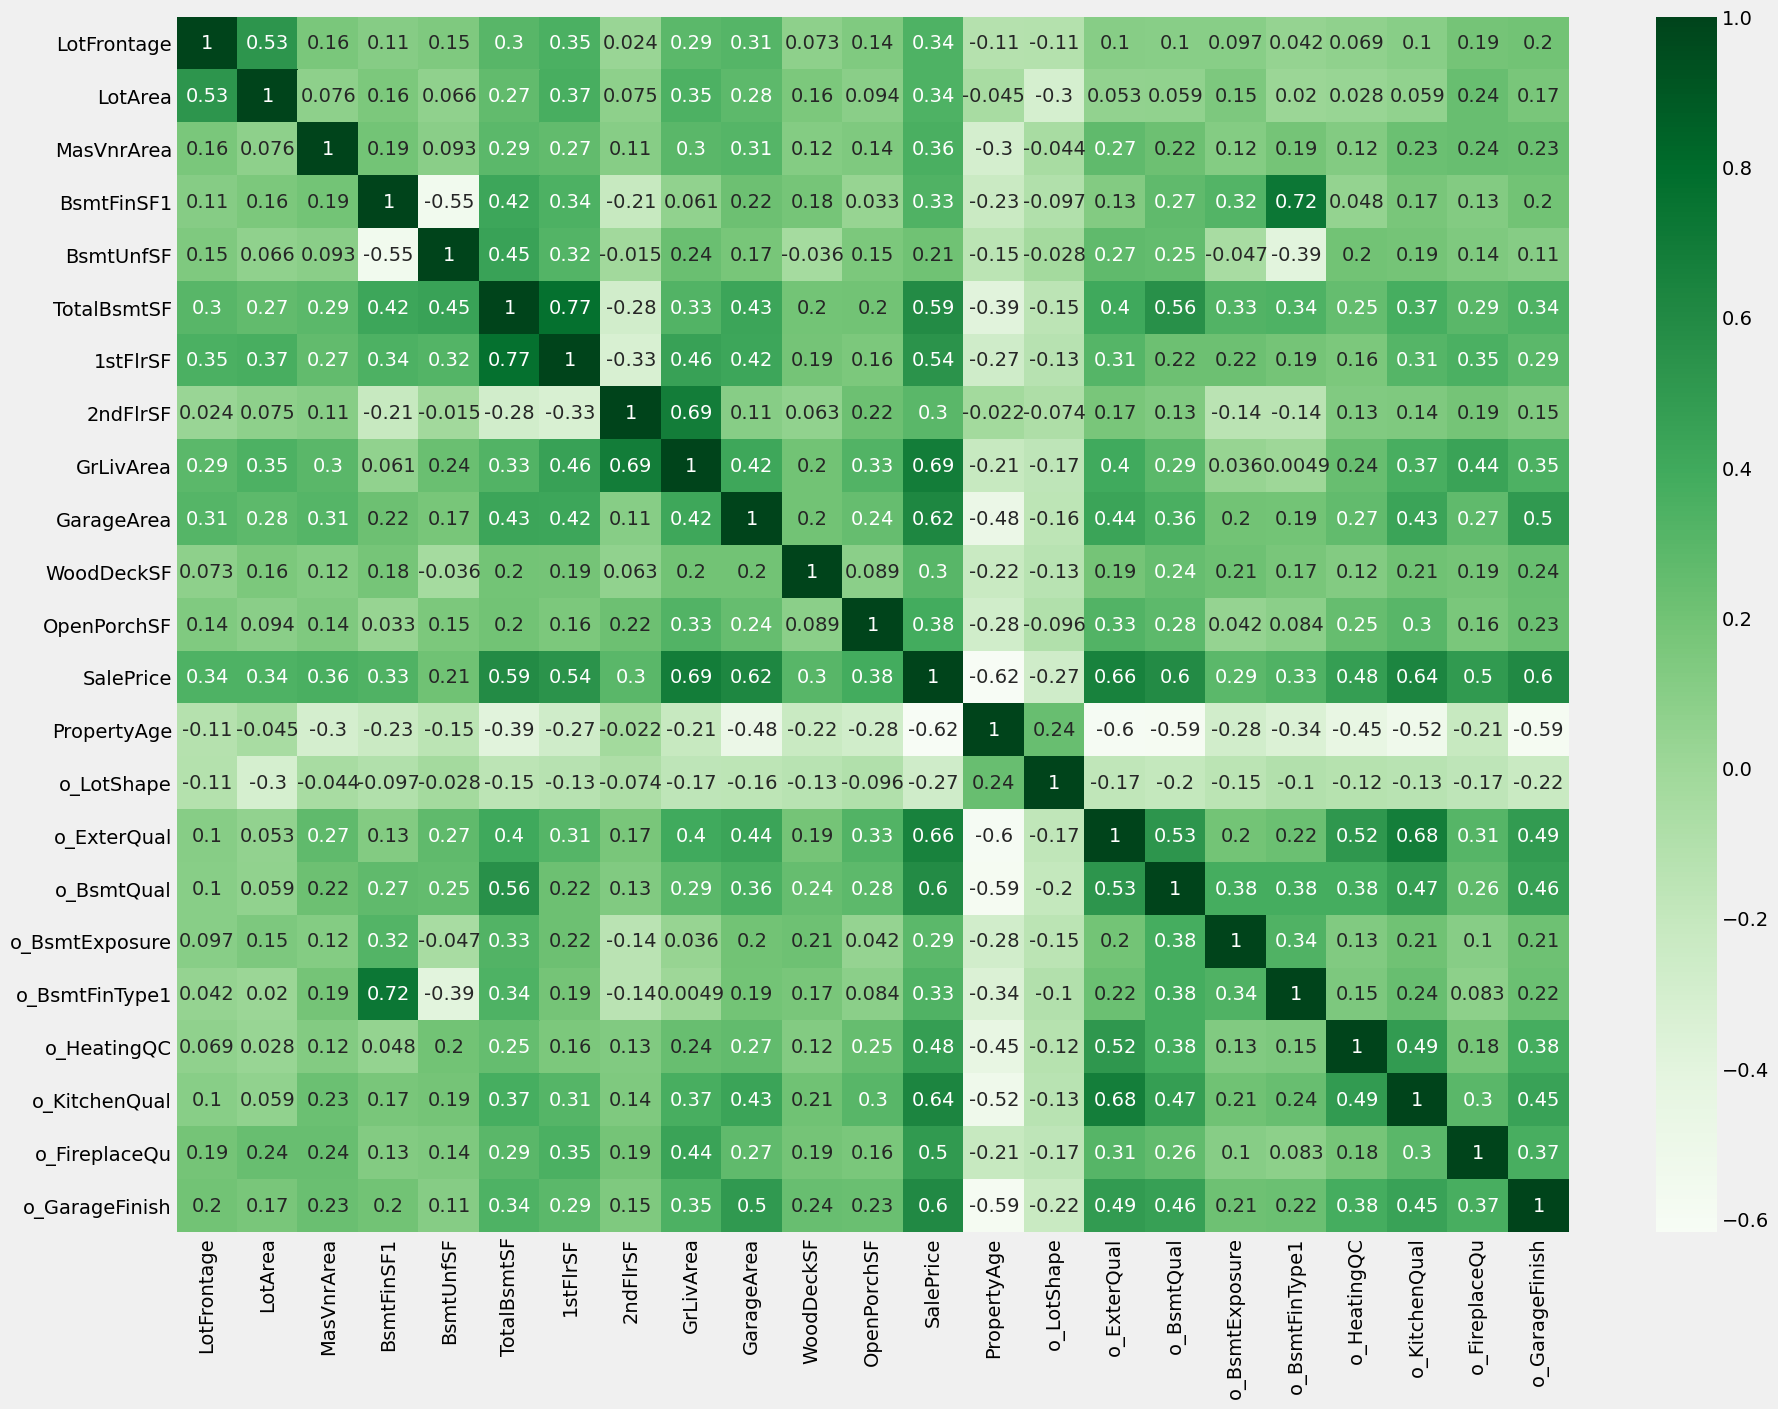

In [60]:
#Plot the heat map

# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(corr, cmap='Greens', annot=True)
plt.show()

**Observations**

***Correlation to the Target Variable***
- SalePrice has a positive Corelation to GrLivArea- (Living Area on the Ground Floor)
- SalePrice is quite Correlated to the Garage Area
- SalePrice is loosely Correlated to the Basement and FirstFloor Square Feet

***MutiCollinearity Indicators***
- TotalBsmtSt is Correlated to 1stFlrSF by 0.77. So we will be dropping 1stFlrSF
- GrLivArea is Correlated to 2ndFlrSF by 0.69, So we will be dropping 2ndFlrSF
- o_BsmtFinType1 is Correlated to BsmtFinSF1 by 0.72. So we will be dropping BsmtFinSF1


In [61]:
final_df = final_df.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1'], axis=1)

In [62]:
final_df.shape

(1340, 131)

We now have 130 Features in the final df. We will break into train and test scale them appropriately

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Columns: 131 entries, LotFrontage to MasVnrType_Stone
dtypes: float64(3), int64(17), object(10), uint8(101)
memory usage: 456.7+ KB


**Train Test Split**

In [64]:
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(final_df, train_size=0.7, test_size = 0.3, random_state=100)

**Scale all the Numeric Variables**

In [65]:
#we will scale all the Ordinal Categorical Variables, and the Numeric variables
#All the variables which are boolean will not need to be scaled
#Filtering out the binary columens
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(final_df)
print(binary_cols)

['isRemodelled_Yes', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Exterior1st_

In [66]:

##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [67]:
print(df_train.shape)
print(df_test.shape)

(937, 131)
(402, 131)


In [68]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [69]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

# 5. Variable Selection using RFE

We will now use RFE to reduce the no of variables to 50% of the existing using RFE. So from 130 variables we will try to reduce the number of 65 variables

In [70]:
def build_sm_model(X, y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print (lm.summary())
    return X

In [71]:
#Common Imports
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Creating X, Y for Training
y_train = df_train.pop('SalePrice')
X_train = df_train

In [72]:
#Initialization of SM and RFE


lm = LinearRegression()
lm.fit(X_train,y_train)

#Lets start with a list of 65 variables
rfe= RFE(lm,65)
rfe = rfe.fit(X_train, y_train)

#Now we will use this and check for the R2 and other metrics using stats model

import statsmodels.api as sm
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

lm  = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:51:16   Log-Likelihood:                -187.20
No. Observations:                 937   AIC:                             504.4
Df Residuals:                     872   BIC:                             819.2
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3647      0.215     -6.360      0.000      -1.786      -0.944
BsmtUnfSF               -0.1053      0.012     -8.513      0.000      -0.130      -0.081
TotalBsmtSF              0.2078      0.018     11.484      0.000       0.172       0.243
GrLivArea                0.3926      0.021     18.455      0.000       0.351       0.434
PropertyAge             -0.2608      0.026     -9.918      0.000      -0.312      -0.209
o_OverallQual            0.1807      0.019      9.401      0.000       0.143       0.218
o_OverallCond            0.1682      0.012     13.817      0.000       0.144       0.192
o_GarageCars             0.1124      0.017      6.703      0.000       0.079       0.145
MSZoning_FV              0.8812      0.177      4.979      0.000       0.534       1.229
MSZoning_RH              0.6278      0.162      3.870      0.000       0.309       0.946
MSZoning_RL              0.8899      0.140      6.342      0.000       0.614       1.165
MSZoning_RM              0.7524      0.142      5.296      0.000       0.474       1.031
Neighborhood_Crawfor     0.3774      0.061      6.180      0.000       0.258       0.497
Neighborhood_Edwards    -0.0549      0.044     -1.256      0.210      -0.141       0.031
Neighborhood_MeadowV    -0.1724      0.149     -1.161      0.246      -0.464       0.119
Neighborhood_Mitchel    -0.0755      0.062     -1.215      0.225      -0.198       0.046
Neighborhood_NPkVill    -0.1722      0.180     -0.956      0.340      -0.526       0.181
Neighborhood_NWAmes     -0.1546      0.048     -3.210      0.001      -0.249      -0.060
Neighborhood_NridgHt     0.2644      0.061      4.357      0.000       0.145       0.384
Neighborhood_OldTown    -0.1864      0.055     -3.416      0.001      -0.294      -0.079
Neighborhood_Sawyer     -0.0447      0.048     -0.935      0.350      -0.138       0.049
Neighborhood_Somerst     0.3152      0.100      3.143      0.002       0.118       0.512
Neighborhood_StoneBr     0.1814      0.099      1.824      0.069      -0.014       0.377
Exterior2nd_Brk Cmn      0.3408      0.258      1.321      0.187      -0.166       0.847
Exterior2nd_CBlock      -0.0977      0.158     -0.618      0.536      -0.408       0.212
Exterior2nd_Stone       -0.2032      0.162     -1.252      0.211      -0.522       0.115
Exterior2nd_Stucco      -0.2505      0.173     -1.448      0.148      -0.590       0.089
Exterior2nd_VinylSd      0.1600      0.112      1.434      0.152      -0.059       0.379
Exterior2nd_Wd Sdng      0.1044      0.063      1.649      0.100      -0.020       0.229
Exterior1st_BrkComm     -0.2864      0.408     -0.701      0.483      -1.088       0.515
Exterior1st_BrkFace      0.1937      0.062      3.129      0.002       0.072       0.315
Exterior1st_CBlock      -0.0977      0.158     -0.618    

**Observation**

This model gives an R2 or 0.91 and a FStatistic of close to Zero. So it could be a good model. There are few multi collinearity warnings, which will get remediated as we regularize the model

We shall use this model to do ridge and lasso regularization

In [73]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 9),
 ('LotArea', False, 37),
 ('MasVnrArea', False, 66),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 13),
 ('WoodDeckSF', False, 33),
 ('OpenPorchSF', False, 24),
 ('PropertyAge', True, 1),
 ('o_LotShape', False, 53),
 ('o_ExterQual', False, 64),
 ('o_BsmtQual', False, 45),
 ('o_BsmtExposure', False, 49),
 ('o_BsmtFinType1', False, 35),
 ('o_HeatingQC', False, 14),
 ('o_KitchenQual', False, 7),
 ('o_FireplaceQu', False, 11),
 ('o_GarageFinish', False, 47),
 ('o_OverallQual', True, 1),
 ('o_OverallCond', True, 1),
 ('o_BsmtFullBath', False, 40),
 ('o_FullBath', False, 30),
 ('o_HalfBath', False, 31),
 ('o_BedroomAbvGr', False, 56),
 ('o_TotRmsAbvGrd', False, 55),
 ('o_Fireplaces', False, 60),
 ('o_GarageCars', True, 1),
 ('o_MoSold', False, 59),
 ('isRemodelled_Yes', False, 65),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Blueste

In [74]:
 ##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top65_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top65_df = top65_df.loc[top65_df['rfe_support'] == True]
top65_df.reset_index(drop=True, inplace=True)
top65_df

Features  rfe_support  rfe_ranking
0              BsmtUnfSF         True            1
1            TotalBsmtSF         True            1
2              GrLivArea         True            1
3            PropertyAge         True            1
4          o_OverallQual         True            1
5          o_OverallCond         True            1
6           o_GarageCars         True            1
7            MSZoning_FV         True            1
8            MSZoning_RH         True            1
9            MSZoning_RL         True            1
10           MSZoning_RM         True            1
11  Neighborhood_Crawfor         True            1
12  Neighborhood_Edwards         True            1
13  Neighborhood_MeadowV         True            1
14  Neighborhood_Mitchel         True            1
15  Neighborhood_NPkVill         True            1
16   Neighborhood_NWAmes         True            1
17  Neighborhood_NridgHt         True            1
18  Neighborhood_OldTown         True            1
19   Neighborhood_Sawyer         True            1
20  Neighborhood_Somerst         True            1
21  Neighborhood_StoneBr         True            1
22   Exterior2nd_Brk Cmn         True            1
23    Exterior2nd_CBlock         True            1
24     Exterior2nd_Stone         True            1
25    Exterior2nd_Stucco         True            1
26   Exterior2nd_VinylSd         True            1
27   Exterior2nd_Wd Sdng         True            1
28   Exterior1st_BrkComm         True            1
29   Exterior1st_BrkFace         True            1
30    Exterior1st_CBlock         True            1
31     Exterior1st_Stone         True            1
32    Exterior1st_Stucco         True            1
33   Exterior1st_VinylSd         True            1
34   Exterior1st_Wd Sdng         True            1
35     HouseStyle_1.5Unf         True            1
36     HouseStyle_1Story         True            1
37     HouseStyle_2.5Fin         True            1
38     HouseStyle_2.5Unf         True            1
39     HouseStyle_2Story         True            1
40     HouseStyle_SFoyer         True            1
41       HouseStyle_SLvl         True            1
42         MSSubClass_40         True            1
43         MSSubClass_50         True            1
44         MSSubClass_70         True            1
45         MSSubClass_80         True            1
46         MSSubClass_85         True            1
47         MSSubClass_90         True            1
48        MSSubClass_160         True            1
49        MSSubClass_180         True            1
50        MSSubClass_190         True            1
51     LotConfig_CulDSac         True            1
52         LotConfig_FR3         True            1
53            Fence_GdWo         True            1
54      Foundation_PConc         True            1
55      Foundation_Stone         True            1
56       Foundation_Wood         True            1
57     GarageType_Attchd         True            1
58    GarageType_Basment         True            1
59    GarageType_BuiltIn         True            1
60    GarageType_CarPort         True            1
61     GarageType_Detchd         True            1
62    MasVnrType_BrkFace         True            1
63       MasVnrType_None         True            1
64      MasVnrType_Stone         True            1

In [75]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]

##Let's Assign top 50 columns to X_train_rfe
X_train_rfe = X_train[col_rfe_sup]

In [76]:
##Making sure that we have only 65 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# 6. Ridge Regression

In [77]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14           3         -0.212362        -0.229452                1
13           2         -0.211532        -0.229454                2
15           4         -0.213057        -0.229477                3
16           5         -0.213713        -0.229612                4
12           1         -0.210379        -0.229766                5
17           6         -0.214360        -0.229814                6
11         0.9         -0.210217        -0.229844                7
10         0.8         -0.210040        -0.229925                8
9          0.7         -0.209857        -0.230013                9
18           7         -0.214998        -0.230023               10
8          0.6         -0.209670        -0.230117               11
19           8         -0.215622        -0.230252               12
7          0.5         -0.209483        -0.230271               13
6          0.4         -0.209290        -0.230454               14
20           9         -0.216212        -0.230492               15
5          0.3         -0.209095        -0.230683               16
21          10         -0.216796        -0.230734               17
4          0.2         -0.208915        -0.230994               18
22          11         -0.217351        -0.231010               19
23          12         -0.217893        -0.231289               20
3          0.1         -0.208755        -0.231402               21
24          13         -0.218419        -0.231562               22
25          14         -0.218930        -0.231839               23
2         0.01         -0.208677        -0.232063               24
26          15         -0.219426        -0.232118               25
1        0.001         -0.208674        -0.232173               26
0       0.0001         -0.208674        -0.232184               27
27          16         -0.219904        -0.232396               28
28          17         -0.220374        -0.232670               29
29          18         -0.220825        -0.232949               30
30          19         -0.221260        -0.233235               31
31          20         -0.221684        -0.233516               32
32          50         -0.230315        -0.239359               33
33         100         -0.238185        -0.245262               34
34         500         -0.286429        -0.290457               35
35        1000         -0.343354        -0.346442               36

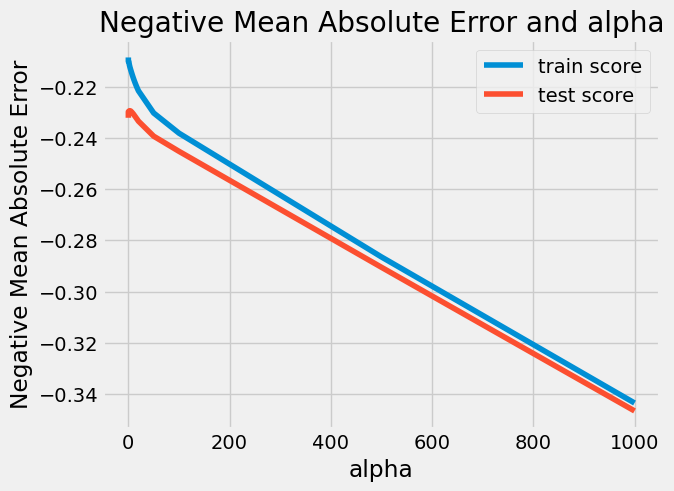

In [79]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [80]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=3.0)

In [81]:
##Checking the coefficient values with lambda (alpha) = 4

ridge = Ridge(alpha=3)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.5727598620243209
Coefficients:
 [-0.10683869  0.2098588   0.38046377 -0.25971339  0.20427347  0.17503646
  0.11369431  0.2817892   0.07899856  0.32653997  0.16614325  0.33738115
 -0.03568066 -0.16349698 -0.06827959 -0.05259867 -0.14597865  0.21308517
 -0.15190119 -0.04072738  0.29526072  0.11554422  0.07969877 -0.03584548
 -0.09291542 -0.07032141  0.08916691  0.0815827   0.00667641  0.17986319
 -0.03584548 -0.08122219  0.09343705 -0.07650862 -0.07944203  0.09074556
  0.02017398 -0.18038877  0.05884048  0.03701812  0.03234694  0.11920897
  0.062765    0.08358273  0.10602113 -0.04285937  0.02015724 -0.18472001
 -0.39150964 -0.12627528  0.1364672   0.07396466 -0.09978636 -0.12950111
  0.09834677  0.0633099  -0.05378378  0.11955232  0.02702172  0.11876773
  0.04931119  0.06293772  0.10730952  0.10239496  0.13361853]


In [82]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0        MSSubClass_160      -0.3915                            0.3915
1             GrLivArea       0.3805                            0.3805
2  Neighborhood_Crawfor       0.3374                            0.3374
3           MSZoning_RL       0.3265                            0.3265
4  Neighborhood_Somerst       0.2953                            0.2953
5           MSZoning_FV       0.2818                            0.2818
6           PropertyAge      -0.2597                            0.2597
7  Neighborhood_NridgHt       0.2131                            0.2131
8           TotalBsmtSF       0.2099                            0.2099
9         o_OverallQual       0.2043                            0.2043

**Model Prediction and Evaluation Metrics:**

In [83]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=3.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=3.0):
 ****************************************

For Train Set:
R2 score: 0.9096736794426218 
MSE score: 0.09032632055737826 
MAE score: 0.21328703059683138 
RMSE score: 0.30054337550073906

For Test Set:
R2 score: 0.8852491134043146 
MSE score: 0.11385202736883343 
MAE score: 0.2361829366123452 
RMSE score: 0.33741966061395035 
 ****************************************


**For Train Set**

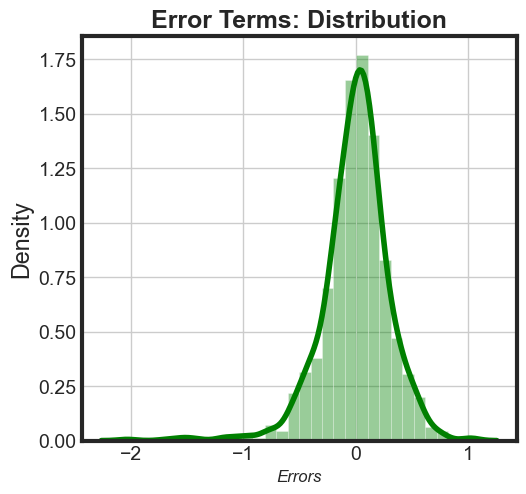

In [84]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation** :
    Error Terms seem to be normally distributed. So our assumptions are true

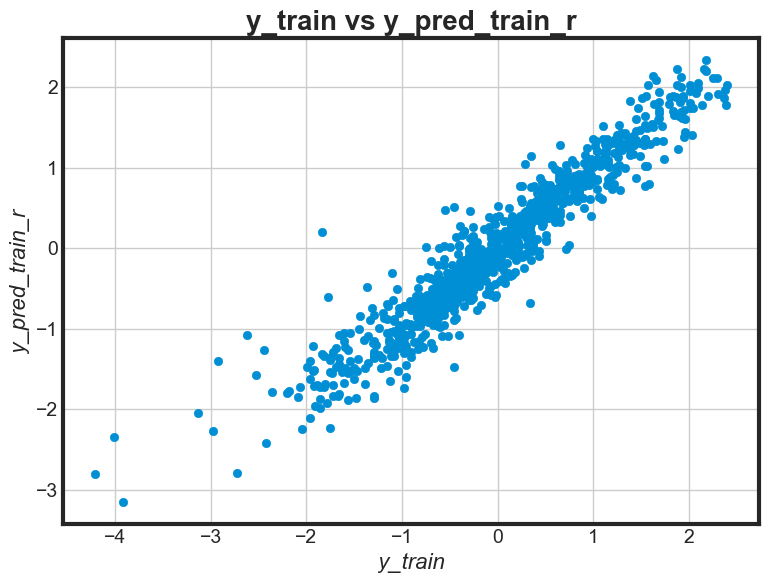

In [85]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [86]:
y_train.shape

(937,)

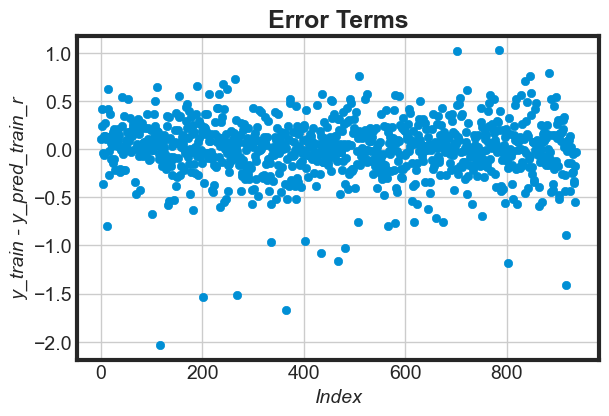

In [87]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

**Observation**
  - Residuals are heteroscedastic and scattered around y=0.  So our assumption is true

**For Test Set**

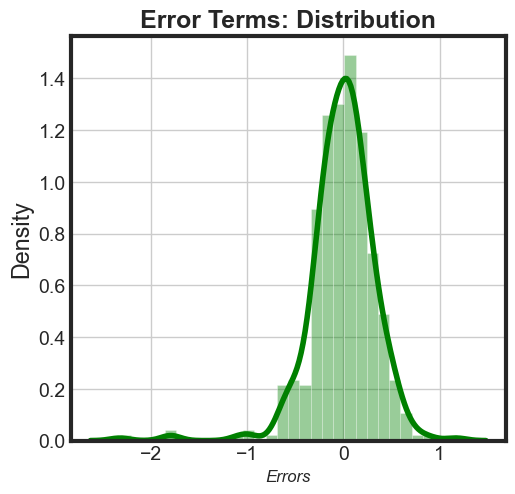

In [88]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

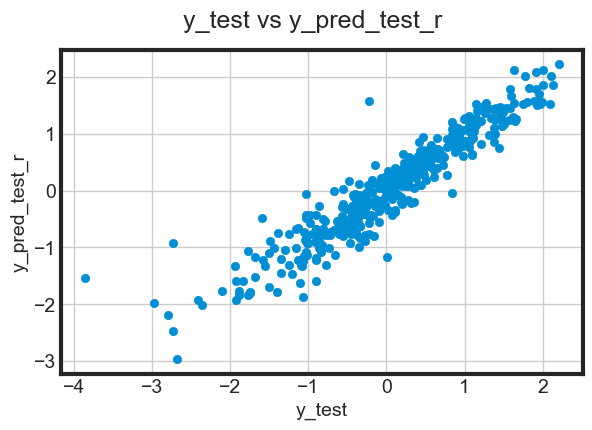

In [89]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [90]:
y_test.shape

(402,)

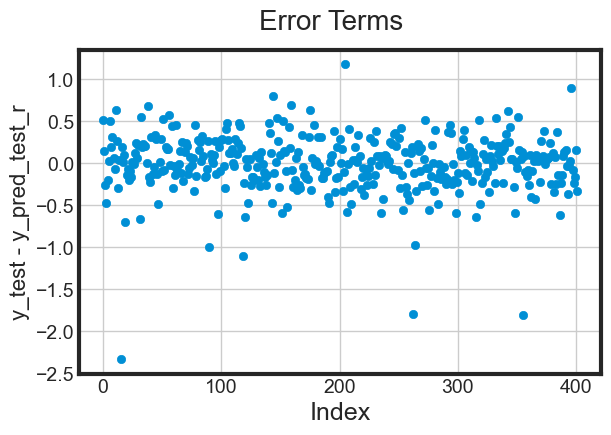

In [91]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,402,1)] #For 402 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

**Observation** 
- The residuals are scattered along (y=0) and are independent of each other.
- The residuals are heteroscedastic

# 7. Lasso Regression

In [92]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
5       0.0006         -0.213477        -0.230743                1
6       0.0007         -0.214027        -0.230770                2
4       0.0005         -0.212774        -0.230772                3
7       0.0008         -0.214467        -0.230850                4
8       0.0009         -0.214841        -0.230913                5
9        0.001         -0.215160        -0.231008                6
3       0.0003         -0.211035        -0.231292                7
10       0.002         -0.218745        -0.231731                8
2       0.0002         -0.210009        -0.231774                9
1       0.0001         -0.209110        -0.232032               10
0        1e-05         -0.208690        -0.232128               11
11       0.003         -0.221337        -0.232285               12
12       0.004         -0.224304        -0.234202               13
13       0.005         -0.227828        -0.237096               14
14        0.01         -0.242219        -0.248409               15
15        0.05         -0.271747        -0.274774               16
16         0.1         -0.303332        -0.306251               17
17         0.2         -0.361763        -0.364176               18
18         0.3         -0.438587        -0.441762               19
19         0.4         -0.520829        -0.523382               20
20         0.5         -0.592557        -0.594531               21
21         0.6         -0.663931        -0.665648               22
22         0.7         -0.726135        -0.727688               23
23         0.8         -0.784845        -0.785726               24
37         100         -0.789549        -0.789702               25
36          50         -0.789549        -0.789702               25
35          20         -0.789549        -0.789702               25
34          10         -0.789549        -0.789702               25
33           9         -0.789549        -0.789702               25
32           8         -0.789549        -0.789702               25
31           7         -0.789549        -0.789702               25
29           5         -0.789549        -0.789702               25
38         500         -0.789549        -0.789702               25
28           4         -0.789549        -0.789702               25
27           3         -0.789549        -0.789702               25
26           2         -0.789549        -0.789702               25
25           1         -0.789549        -0.789702               25
24         0.9         -0.789549        -0.789702               25
30           6         -0.789549        -0.789702               25
39        1000         -0.789549        -0.789702               25

In [94]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
6       0.0006         -0.213477        -0.230743                1
7       0.0007         -0.214027        -0.230770                2
5       0.0005         -0.212774        -0.230772                3
8       0.0008         -0.214467        -0.230850                4
9       0.0009         -0.214841        -0.230913                5
4       0.0004         -0.211952        -0.230977                6
10       0.001         -0.215160        -0.231008                7
3       0.0003         -0.211035        -0.231292                8
11       0.002         -0.218745        -0.231731                9
2       0.0002         -0.210009        -0.231774               10
1       0.0001         -0.209110        -0.232032               11
0        1e-05         -0.208690        -0.232128               12
12       0.003         -0.221337        -0.232285               13
13       0.005         -0.227828        -0.237096               14
14        0.01         -0.242219        -0.248409               15
15        0.02         -0.253314        -0.258715               16
16        0.05         -0.271747        -0.274774               17

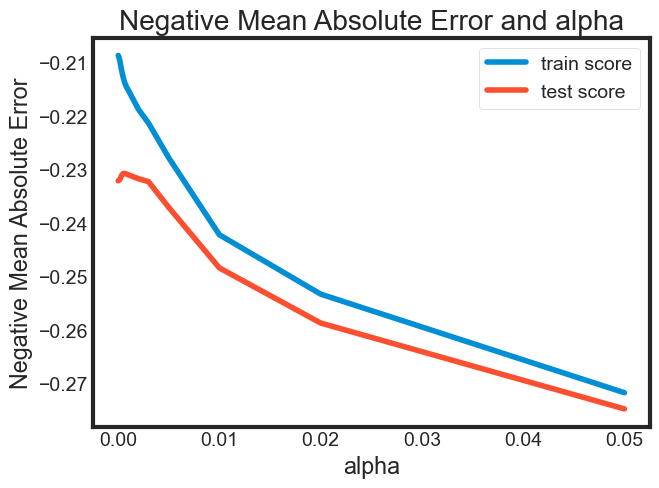

In [96]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [97]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0006)

In [138]:
# check the coefficient values with lambda = 0.0006

lasso = Lasso(alpha=0.0006)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.44625260296348046
Coefficients:
  [-0.10495602  0.2064652   0.38141489 -0.26185363  0.20795487  0.17593761
  0.11462626  0.30766958  0.0802164   0.35206353  0.19694179  0.3519798
 -0.02161093 -0.17229683 -0.05144669 -0.         -0.14183595  0.21520935
 -0.14815364 -0.03178361  0.30918261  0.10574971  0.         -0.
 -0.03487146 -0.          0.01080879  0.05538109  0.          0.18064748
 -0.         -0.          0.         -0.         -0.05233639  0.02100736
 -0.02175389 -0.22272845  0.          0.          0.          0.03402588
  0.          0.02959847  0.0762034  -0.          0.         -0.19906634
 -0.42388348 -0.09344854  0.10817725  0.06136175 -0.         -0.12119436
  0.09294017  0.         -0.          0.09274726  0.          0.08193653
  0.          0.04412884  0.022913    0.01650793  0.04083828]


In [140]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.0006):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.0006):
 ****************************************

For Train Set:
R2 score: 0.9085574638360507 
MSE score: 0.09144253616394922 
MAE score: 0.2150839979509765 
RMSE score: 0.3023946695362688

For Test Set:
R2 score: 0.8859459960943489 
MSE score: 0.11316060345523694 
MAE score: 0.2361529382068441 
RMSE score: 0.3363935246927874 
 ****************************************


In [141]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0        MSSubClass_160      -0.4239                            0.4239
1             GrLivArea       0.3814                            0.3814
2           MSZoning_RL       0.3521                            0.3521
3  Neighborhood_Crawfor       0.3520                            0.3520
4  Neighborhood_Somerst       0.3092                            0.3092
5           MSZoning_FV       0.3077                            0.3077
6           PropertyAge      -0.2619                            0.2619
7     HouseStyle_2.5Fin      -0.2227                            0.2227
8  Neighborhood_NridgHt       0.2152                            0.2152
9         o_OverallQual       0.2080                            0.2080

**Residual Analysis of Model**


**Train Set**

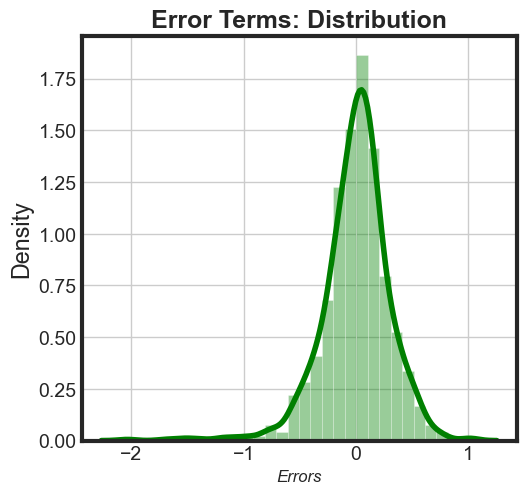

In [142]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_l)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation** 
- The Error Terms are normally distributed with Mean of 0 and Std Deviation of 
- The Assumption is Valid

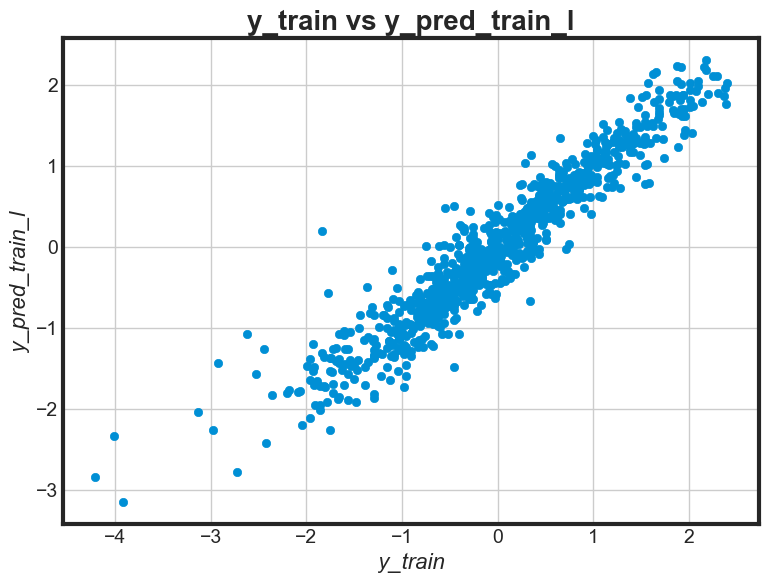

In [143]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [144]:
y_train.shape

(937,)

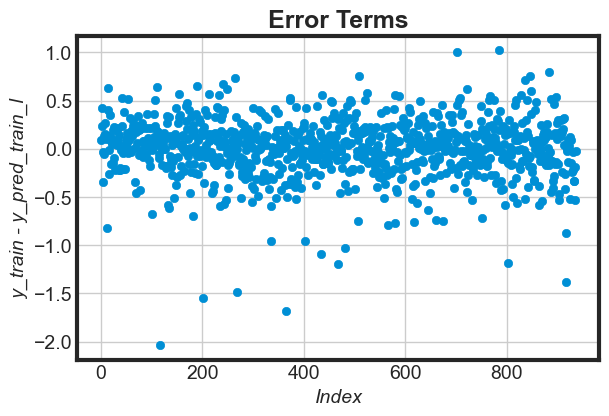

In [145]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

**Observation**
- Residuals are heteroscedastic
- They are centered around y=0
- Assumptions are valid

**For Test Set**

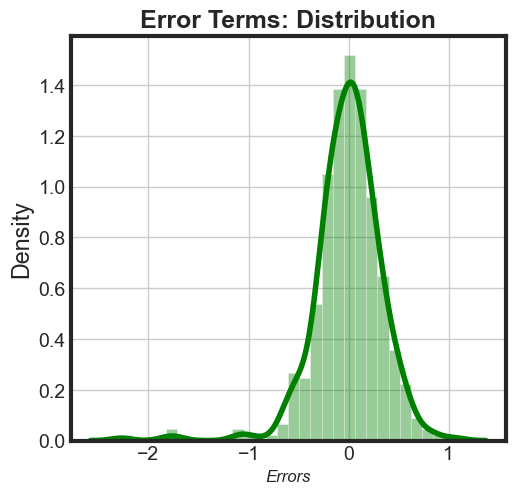

In [146]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**Observation**
- Errors for the Predicted Variables have a mean of 0 and std deviation of 1
- Assumptions are valid

In [147]:
y_test.shape

(402,)

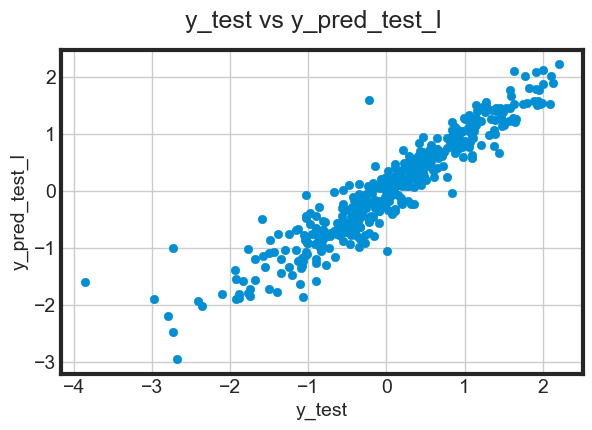

In [148]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()


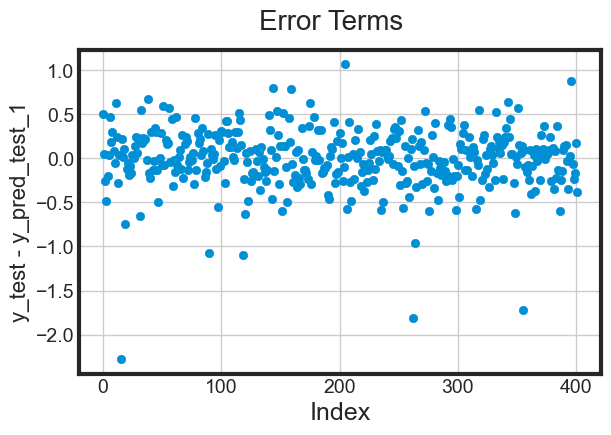

In [149]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,402,1)] #For 402 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

**Observation**
- Residuals are heteroscedastic
- They are centered around y=0
- Assumptions are valid

# 8. Answers to Questions


- What is the optimal value of alpha for ridge and lasso regression? 
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Based on the above analysis Optimal Value Alpha 
- for Ridge Regression is -3
- for Lasso Regression is - 0.0006

**RIDGE REGRESSION**

In [150]:
##Checking the outcome: coefficient values with double the value of alpha = 8*2 = 16

ridge = Ridge(alpha=9)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.3428317833638419
Coefficients:
 [-0.10610212  0.21108157  0.37331085 -0.24692699  0.21994496  0.17562564
  0.12037595  0.16856514 -0.01561441  0.19475621  0.00939955  0.2855785
 -0.03063016 -0.1122531  -0.05621296 -0.03691925 -0.13024894  0.16092855
 -0.12806878 -0.03430268  0.22812308  0.06438841  0.02388116 -0.01731447
 -0.04155349 -0.02495565  0.05557158  0.060184    0.01047222  0.15502668
 -0.01731447 -0.03810735  0.03601354 -0.03377818 -0.05640234  0.05049427
 -0.00066008 -0.0973418   0.03006374  0.01241452 -0.00833925  0.05735306
  0.02834855  0.05795721  0.09086349 -0.00371318  0.02586169 -0.14809641
 -0.31374533 -0.06833611  0.09781878  0.06425663 -0.04205891 -0.10724999
  0.10268982  0.02370303 -0.02142716  0.1012613   0.00415413  0.0954982
  0.00496308  0.03859983  0.04326304  0.04494355  0.07527741]


In [152]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha3*3=9):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha3*3=9):
 ****************************************

For Train Set:
R2 score: 0.9066699216586404 
MSE score: 0.09333007834135966 
MAE score: 0.21658338787483453 
RMSE score: 0.30549971905283263

For Test Set:
R2 score: 0.885470656694236 
MSE score: 0.11363221945748903 
MAE score: 0.23597865066579454 
RMSE score: 0.33709378436495835 
 ****************************************


In [153]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             GrLivArea       0.3733                            0.3733
1        MSSubClass_160      -0.3137                            0.3137
2  Neighborhood_Crawfor       0.2856                            0.2856
3           PropertyAge      -0.2469                            0.2469
4  Neighborhood_Somerst       0.2281                            0.2281
5         o_OverallQual       0.2199                            0.2199
6           TotalBsmtSF       0.2111                            0.2111
7           MSZoning_RL       0.1948                            0.1948
8         o_OverallCond       0.1756                            0.1756
9           MSZoning_FV       0.1686                            0.1686

In [154]:
print("For Ridge Regression (Doubled alpha model, alpha=3*3=9): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(ridge_df['Features'].head(10)),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=3*3=9): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['GrLivArea', 'MSSubClass_160', 'Neighborhood_Crawfor', 'PropertyAge', 'Neighborhood_Somerst', 'o_OverallQual', 'TotalBsmtSF', 'MSZoning_RL', 'o_OverallCond', 'MSZoning_FV'] 
 *****************************************************************************************************************************


**LASSO REGRESSION**

In [155]:
##Checking the outcome: coefficient values with double the value of alpha = 0.0006*2 = 0.0012 (For Lasso Regression)

lasso_double = Lasso(alpha=0.0012)
        
lasso_double.fit(X_train, y_train) 
print("Intercept: ", lasso_double.intercept_)
print("Coefficients:\n ", lasso_double.coef_)

Intercept:  -0.2517466031161867
Coefficients:
  [-0.10407668  0.207766    0.37789451 -0.25724213  0.22277165  0.17724926
  0.11941799  0.12566103 -0.          0.1985661   0.01812957  0.333685
 -0.00426965 -0.13192425 -0.01925633 -0.         -0.12906683  0.18544124
 -0.11198684 -0.00895674  0.30193424  0.02983298  0.         -0.
 -0.         -0.          0.01087229  0.01547849  0.          0.16930422
 -0.         -0.          0.          0.         -0.01160852  0.
 -0.02315622 -0.06869821  0.          0.         -0.          0.01125028
  0.          0.01760238  0.043144    0.          0.         -0.19085803
 -0.38100829 -0.01055311  0.06297473  0.0426138  -0.         -0.10049195
  0.09311036  0.         -0.          0.0712508  -0.          0.05423195
  0.          0.02168464  0.          0.          0.00765759]


In [176]:
#RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso_double.predict(X_train)
y_pred_test_l = lasso_double.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.0006*2 = 0.0012)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.0006*2 = 0.0012)
 ****************************************

For Train Set:
R2 score: 0.9058443893093867 
MSE score: 0.09415561069061332 
MAE score: 0.2173018211538171 
RMSE score: 0.30684786245078083

For Test Set:
R2 score: 0.8845325928962782 
MSE score: 0.1145629352747454 
MAE score: 0.2376162295487515 
RMSE score: 0.33847146892278146 
 ****************************************


In [158]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_double.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_double.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0        MSSubClass_160      -0.3810                            0.3810
1             GrLivArea       0.3779                            0.3779
2  Neighborhood_Crawfor       0.3337                            0.3337
3  Neighborhood_Somerst       0.3019                            0.3019
4           PropertyAge      -0.2572                            0.2572
5         o_OverallQual       0.2228                            0.2228
6           TotalBsmtSF       0.2078                            0.2078
7           MSZoning_RL       0.1986                            0.1986
8         MSSubClass_90      -0.1909                            0.1909
9  Neighborhood_NridgHt       0.1854                            0.1854

In [177]:
print("For Lasso Regression (Doubled alpha model: alpha:0.006*2 = 0.0012): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(lasso_df['Features'].head(10)),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.006*2 = 0.0012): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'TotalBsmtSF', 'MSZoning_RM', 'GarageType_BuiltIn', 'Neighborhood_NPkVill', 'Exterior1st_Stone', 'Exterior1st_BrkFace', 'MSSubClass_70', 'o_OverallQual'] 
 *****************************************************************************************************************************


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [160]:
lasso_top_5 = ['MSSubClass_160','GrLivArea','Neighborhood_Crawfor','Neighborhood_Somerst','MSZoning_RL']

print("The Top 5 Features to be removed are : \n","*"*125)
print(list(lasso_top_5))

The Top 5 Features to be removed are : 
 *****************************************************************************************************************************
['MSSubClass_160', 'GrLivArea', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'MSZoning_RL']


In [161]:
X_train_drop_5= X_train.drop(lasso_top_5, axis=1)

In [162]:
X_test_drop_5 = X_test.drop(lasso_top_5, axis=1)

In [163]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_drop_5, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4       0.0005         -0.277142        -0.297607                1
5       0.0006         -0.278001        -0.297623                2
6       0.0007         -0.278802        -0.297857                3
3       0.0003         -0.275379        -0.298150                4
7       0.0008         -0.279543        -0.298232                5
8       0.0009         -0.280298        -0.298612                6
2       0.0002         -0.274555        -0.298849                7
9        0.001         -0.281075        -0.298918                8
1       0.0001         -0.274000        -0.299745                9
0        1e-05         -0.273714        -0.300852               10
10       0.002         -0.286575        -0.301602               11
11       0.003         -0.290969        -0.302755               12
12       0.004         -0.293836        -0.303529               13
13       0.005         -0.295929        -0.304417               14
14        0.01         -0.305136        -0.311012               15
15        0.05         -0.357755        -0.360915               16
16         0.1         -0.386098        -0.387777               17
17         0.2         -0.425201        -0.426615               18
18         0.3         -0.482765        -0.484394               19
19         0.4         -0.546790        -0.548729               20
20         0.5         -0.606611        -0.608222               21
21         0.6         -0.664283        -0.665949               22
22         0.7         -0.726135        -0.727688               23
23         0.8         -0.784845        -0.785726               24
37         100         -0.789549        -0.789702               25
36          50         -0.789549        -0.789702               25
35          20         -0.789549        -0.789702               25
34          10         -0.789549        -0.789702               25
33           9         -0.789549        -0.789702               25
32           8         -0.789549        -0.789702               25
31           7         -0.789549        -0.789702               25
29           5         -0.789549        -0.789702               25
38         500         -0.789549        -0.789702               25
28           4         -0.789549        -0.789702               25
27           3         -0.789549        -0.789702               25
26           2         -0.789549        -0.789702               25
25           1         -0.789549        -0.789702               25
24         0.9         -0.789549        -0.789702               25
30           6         -0.789549        -0.789702               25
39        1000         -0.789549        -0.789702               25

In [165]:
##Plotting a magnified graph for a lower range of alpha.

lasso_remove_5 = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv_remove_5 = GridSearchCV(estimator = lasso_remove_5,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_remove_5.fit(X_train_drop_5, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
lasso_cv_results = pd.DataFrame(lasso_model_cv_remove_5.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
5       0.0005         -0.277142        -0.297607                1
6       0.0006         -0.278001        -0.297623                2
4       0.0004         -0.276303        -0.297628                3
7       0.0007         -0.278802        -0.297857                4
3       0.0003         -0.275379        -0.298150                5
8       0.0008         -0.279543        -0.298232                6
9       0.0009         -0.280298        -0.298612                7
2       0.0002         -0.274555        -0.298849                8
10       0.001         -0.281075        -0.298918                9
1       0.0001         -0.274000        -0.299745               10
0        1e-05         -0.273714        -0.300852               11
11       0.002         -0.286575        -0.301602               12
12       0.003         -0.290969        -0.302755               13
13       0.005         -0.295929        -0.304417               14
14        0.01         -0.305136        -0.311012               15
15        0.02         -0.313588        -0.318480               16
16        0.05         -0.357755        -0.360915               17

In [167]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [168]:
# check the coefficient values with lambda = 0.0005

lasso_remove_5 = Lasso(alpha=0.0005)
        
lasso_remove_5.fit(X_train_drop_5, y_train) 
print("Intercept: ",lasso_remove_5.intercept_)
print("Coefficients:\n ",lasso_remove_5.coef_)

Intercept:  -0.03361791762946051
Coefficients:
  [-0.11013936  0.37319033 -0.15865726  0.30420692  0.17876793  0.19462231
  0.06543977 -0.13137389 -0.36104387 -0.         -0.19424819 -0.1069481
 -0.35125989 -0.09872513  0.09711167 -0.11358381 -0.03364042  0.
  0.         -0.          0.08788684 -0.          0.20753415  0.03509817
  0.05511548  0.31193016 -0.          0.31267247  0.12924314 -0.16434496
 -0.         -0.26101212 -0.30016151  0.39262877  0.24624184  0.1513176
 -0.37728972 -0.09978576  0.23936735  0.16169587  0.30565666 -0.00731353
  0.03585549  0.13653631  0.          0.20758318  0.09036615 -0.14403799
 -0.09261301  0.09828955  0.         -0.          0.13153207  0.
  0.35473114 -0.00298322 -0.06798002  0.04796111  0.03489917  0.0671082 ]


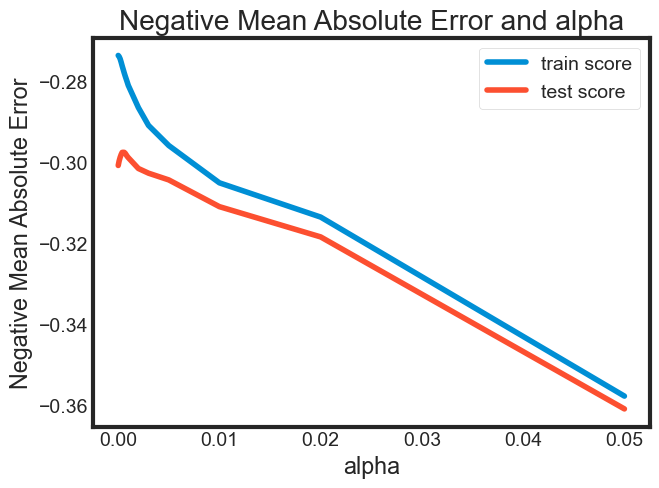

In [169]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [170]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso_remove_5.predict(X_train_drop_5)
y_pred_test_l = lasso_remove_5.predict(X_test_drop_5)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Remove 5 Model: alpha=0.0001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Remove 5 Model: alpha=0.0001):
 ****************************************

For Train Set:
R2 score: 0.8555608606824168 
MSE score: 0.1444391393175832 
MAE score: 0.27956074581820284 
RMSE score: 0.3800514956128751

For Test Set:
R2 score: 0.8373798479558656 
MSE score: 0.16134632638166277 
MAE score: 0.2817023579542508 
RMSE score: 0.40167938256980873 
 ****************************************


In [171]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_drop_5.columns, 'Coefficient':lasso_remove_5.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_remove_5.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0     HouseStyle_2.5Fin       0.3926                            0.3926
1     HouseStyle_SFoyer      -0.3773                            0.3773
2           TotalBsmtSF       0.3732                            0.3732
3           MSZoning_RM      -0.3610                            0.3610
4    GarageType_BuiltIn       0.3547                            0.3547
5  Neighborhood_NPkVill      -0.3513                            0.3513
6     Exterior1st_Stone       0.3127                            0.3127
7   Exterior1st_BrkFace       0.3119                            0.3119
8         MSSubClass_70       0.3057                            0.3057
9         o_OverallQual       0.3042                            0.3042

In [172]:
print("For Lasso Regression (Remove 5 features model: alpha:0.0001): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(lasso_df['Features'].head(10)),"\n", "*"*125)

For Lasso Regression (Remove 5 features model: alpha:0.0001): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'TotalBsmtSF', 'MSZoning_RM', 'GarageType_BuiltIn', 'Neighborhood_NPkVill', 'Exterior1st_Stone', 'Exterior1st_BrkFace', 'MSSubClass_70', 'o_OverallQual'] 
 *****************************************************************************************************************************


**Residual Analysis**

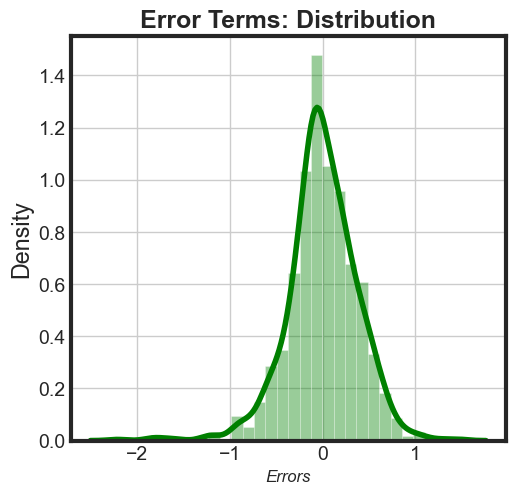

In [173]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_l)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

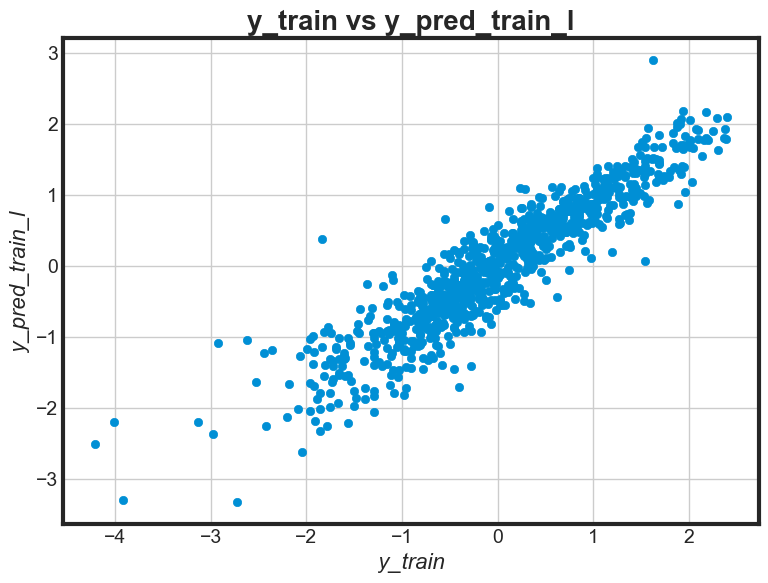

In [174]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

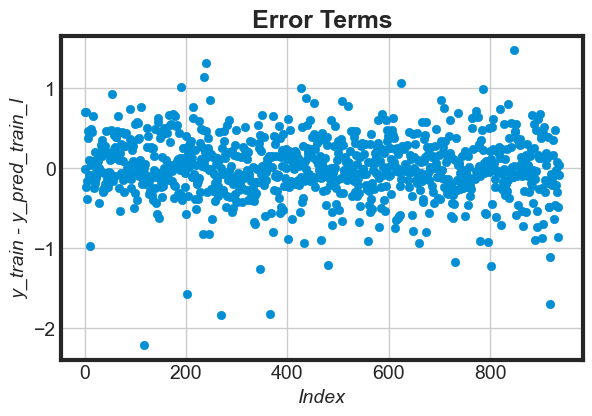

In [175]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,937,1)] #For 937 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()